# Gotran based ODE solver 
- This is the project based on P2-receptor mediated calcium transients in microglia. The script is written to operate Gotran script (.ode file). 
- [Gotran Source in Github](https://github.com/ComputationalPhysiology/gotran) 

## Project 
- Author: Byeong Jae (Ben Chun) and Pete Kekenes-Huskey 
- [bioRxiv](https://www.biorxiv.org/content/10.1101/2021.06.19.448892v2)

### Installing Gotran and downloading customized script for the project 
- In git, there are 4 files in "MicrogliaGotran" directory 
 - ScriptRunnter.py

 - analyzeGotran.py

 - dcBen.py

 - gotranJIT.py

 - **EqnScript.ode**: This contains parameters and equations for the modeling. 

#### ***Warning***

You should be able to edit scripts in Colab, but any files are not going to be stored unless you download them in your local workstation. 

Make sure download what has been updated. 

In [ ]:
! python -m pip install gotran
! pip install spectrum
! pip install instant    
! pip install cppyy
! git clone https://bitbucket.org/fenics-project/dijitso.git
! pip install ./dijitso

     |████████████████████████████████| 145 kB 15.8 MB/s 
     |████████████████████████████████| 2.5 MB 5.6 MB/s 
     |████████████████████████████████| 209 kB 24.3 MB/s 
     |████████████████████████████████| 230 kB 19.7 MB/s 
     |████████████████████████████████| 47 kB 3.5 MB/s 
  Created wheel for spectrum: filename=spectrum-0.8.1-cp37-cp37m-linux_x86_64.whl size=235153 sha256=6300c515335ff9514accfba45cf793951327a918a128abff8bdaa13ea75af6c7
  Stored in directory: /root/.cache/pip/wheels/79/db/9c/92fa684ca088447807d08672e7609b48102c6161ac9c7e3c62
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=11368df1bce8afc9c90f9cf2a5cb3834240615e2fd04b0fcae8ca54ae3526cd5
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built spectrum easydev
     |████████████████████████████████| 75 kB 3.9 MB/s 
  Created wheel for instant: filename=instant-2017.1.0-py3-none-any.whl size=57147 sha25

### Adjustment of Working directory and Adding the library path 
/content -> /content/MicrogliaGotran


In [ ]:
! git clone https://github.com/bending456/MicrogliaGotran.git

import sys
sys.path.append('./MicrogliaGotran')
import os 
os.chdir('/content/MicrogliaGotran')

Cloning into 'MicrogliaGotran'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 38 (delta 4), reused 7 (delta 2), pack-reused 28
Unpacking objects: 100% (38/38), done.


### Test Run 

In [ ]:
! python dcBen.py -odeName EqnScript -dt 0.001 -dSr 1 -jit -iters 1 -T 100 -var stim_amplitude 100 -var stim_period 10

dcBen.py:410: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dt = np.float(sys.argv[i+1])
dcBen.py:404: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  downsampleRate= np.float(sys.argv[i+1])
dcBen.py:416: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will n

### Loading up the packages 

In [ ]:
import matplotlib.pylab as plt 
# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
import math
import analyzeGotran as ao
import subprocess as sb
from subprocess import PIPE
import shlex
import time
import ScriptRunner as SR
import matplotlib.pyplot as plt; plt.rcdefaults()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import pickle

from spectrum import *
#from scipy.interpolate import spline
from scipy import stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

### ODE File name 

In [ ]:
odefilename = 'EqnScript'

## P2X-P2Y Paper Figure Generator

### Resonance of G protein and IP3

In [ ]:
duration = 1000
data_name = ['100wCD39','1000wCD39']
ATPselec = [100,1000]
data_storage_Gprot1 = {}
data_storage_DAG1 = {}

for i in np.arange(len(ATPselec)):
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATPselec[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 1,
                                 removePickle  = 0)
    
    data_storage_Gprot1[data_name[i]] = rawdata[2]
    data_storage_DAG1[data_name[i]] = rawdata[3]
    


 -------------- 27.757453680038452 seconds --------------
 ------------ End of Simulation -----------
 -------------- 21.704959392547607 seconds --------------
 ------------ End of Simulation -----------


In [ ]:
duration = 1000
data_name = ['100-ATP','1000-ATP', '100-UTP', '1000-UTP']
ATPselec = [100,1000]
data_storage_Gprot1 = {}
data_storage_DAG1 = {}
data_storage_Ca1 = {}

for i,j in enumerate(ATPselec):
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = j,
                                 UTP           = 0,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 0,
                                 removePickle  = 0)
    
    data_storage_Ca1[data_name[i]] = rawdata[1]
    data_storage_Gprot1[data_name[i]] = rawdata[2]
    data_storage_DAG1[data_name[i]] = rawdata[3]

    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = 0,
                                 UTP           = j,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 0,
                                 removePickle  = 0)
    
    data_storage_Ca1[data_name[i+2]] = rawdata[1]
    data_storage_Gprot1[data_name[i+2]] = rawdata[2]
    data_storage_DAG1[data_name[i+2]] = rawdata[3]

 -------------- 25.46056032180786 seconds --------------
 ------------ End of Simulation -----------
 -------------- 25.531965970993042 seconds --------------
 ------------ End of Simulation -----------
 -------------- 28.613182544708252 seconds --------------
 ------------ End of Simulation -----------
 -------------- 25.96436619758606 seconds --------------
 ------------ End of Simulation -----------


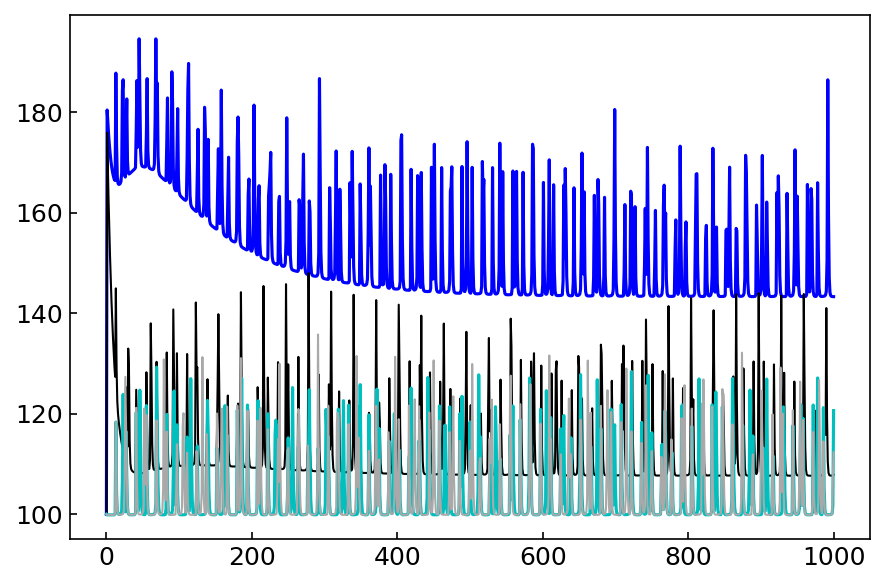

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(rawdata[0],data_storage_Ca1['1000-ATP'],'b',alpha=1,label='1 mM - CD39 KO')
plt.plot(rawdata[0],data_storage_Ca1['100-ATP'],'k',lw=1,alpha=1,label='100 uM - CD39 KO')
plt.plot(rawdata[0],data_storage_Ca1['1000-UTP'],'c',alpha=1,label='1 mM - CD39 KO')
plt.plot(rawdata[0],data_storage_Ca1['100-UTP'],'darkgray',lw=1,alpha=1,label='100 uM - CD39 KO')
plt.tight_layout()

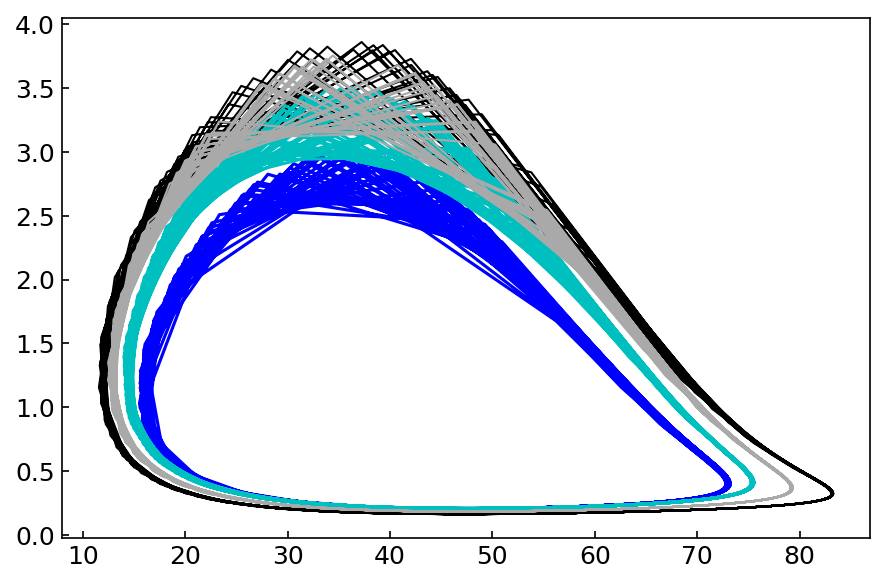

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(data_storage_Gprot1['1000-ATP'][100:-1],data_storage_DAG1['1000-ATP'][100:-1],'b',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot1['100-ATP'][100:-1],data_storage_DAG1['100-ATP'][100:-1],'k',lw=1,alpha=1,label='100 uM - CD39 KO')
plt.plot(data_storage_Gprot1['1000-UTP'][100:-1],data_storage_DAG1['1000-UTP'][100:-1],'c',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot1['100-UTP'][100:-1],data_storage_DAG1['100-UTP'][100:-1],'darkgray',lw=1,alpha=1,label='100 uM - CD39 KO')
plt.tight_layout()


In [ ]:
duration = 1000
data_name = ['100-ATP','1000-ATP', '100-UTP', '1000-UTP']
ATPselec = [100,1000]
data_storage_Ca2 = {}
data_storage_Gprot2 = {}
data_storage_DAG2 = {}

for i,j in enumerate(ATPselec):
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = j,
                                 UTP           = 0,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 1,
                                 removePickle  = 0)
    data_storage_Ca2[data_name[i]] = rawdata[1]
    data_storage_Gprot2[data_name[i]] = rawdata[2]
    data_storage_DAG2[data_name[i]] = rawdata[3]

    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = 0,
                                 UTP           = j,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 1,
                                 removePickle  = 0)
    data_storage_Ca2[data_name[i+2]] = rawdata[1]
    data_storage_Gprot2[data_name[i+2]] = rawdata[2]
    data_storage_DAG2[data_name[i+2]] = rawdata[3]

 -------------- 22.055115461349487 seconds --------------
 ------------ End of Simulation -----------
 -------------- 21.896991968154907 seconds --------------
 ------------ End of Simulation -----------
 -------------- 21.075647115707397 seconds --------------
 ------------ End of Simulation -----------
 -------------- 22.512473106384277 seconds --------------
 ------------ End of Simulation -----------


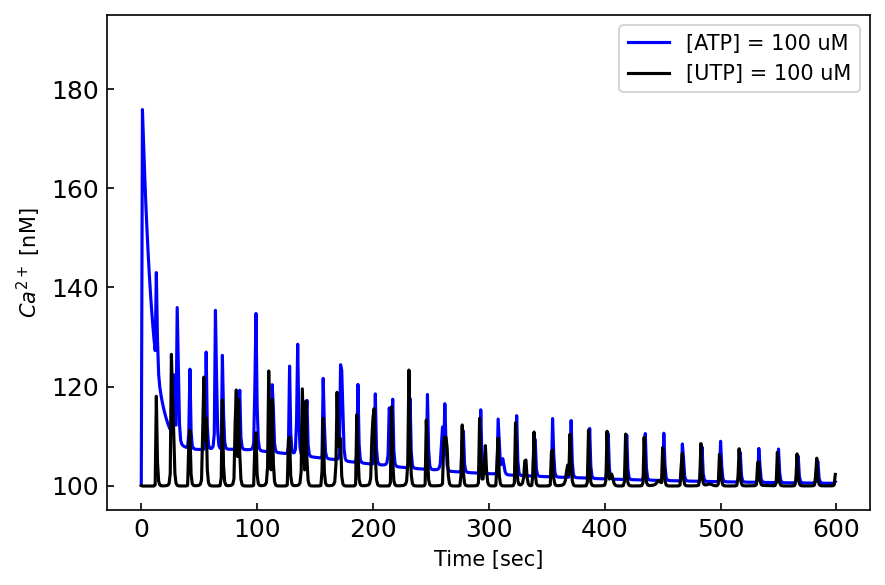

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(rawdata[0][0:600],data_storage_Ca2['100-ATP'][0:600],'b',alpha=1,label='[ATP] = 100 uM')
plt.plot(rawdata[0][0:600],data_storage_Ca2['100-UTP'][0:600],'k',alpha=1,label='[UTP] = 100 uM')
plt.ylabel('$Ca^{2+}$ [nM]')
plt.xlabel('Time [sec]')
plt.legend(loc=0)
plt.ylim([95,195])
plt.tight_layout()

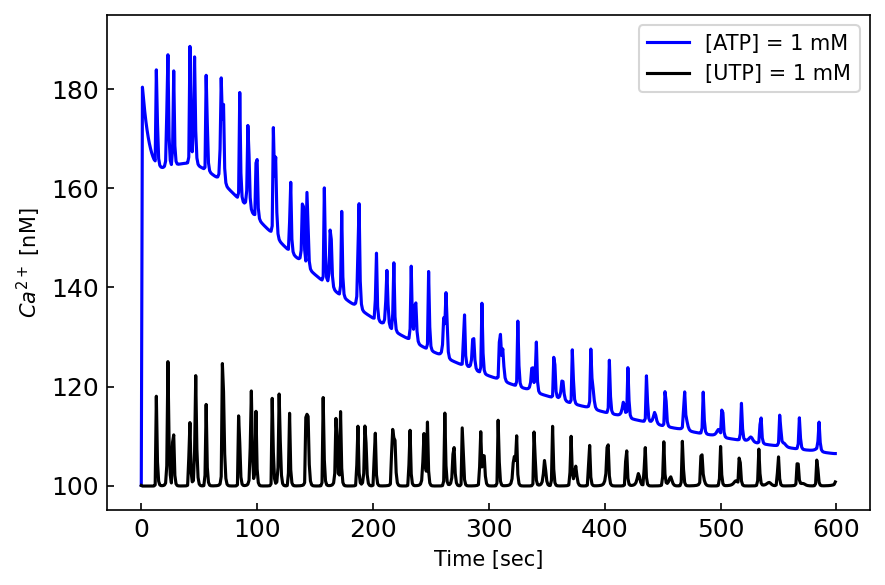

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(rawdata[0][0:600],data_storage_Ca2['1000-ATP'][0:600],'b',alpha=1,label='[ATP] = 1 mM')
plt.plot(rawdata[0][0:600],data_storage_Ca2['1000-UTP'][0:600],'k',alpha=1,label='[UTP] = 1 mM')
plt.ylabel('$Ca^{2+}$ [nM]')
plt.xlabel('Time [sec]')
plt.legend(loc=0)
plt.ylim([95,195])
plt.tight_layout()

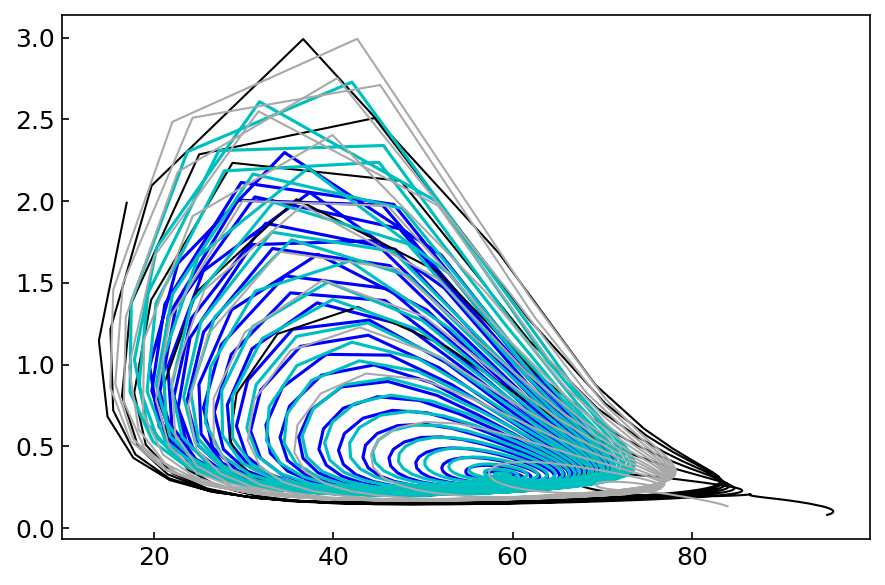

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(data_storage_Gprot2['1000-ATP'][100:-1],data_storage_DAG2['1000-ATP'][100:-1],'b',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot2['100-ATP'][100:-1],data_storage_DAG2['100-ATP'][100:-1],'k',lw=1,alpha=1,label='100 uM - CD39 KO')
plt.plot(data_storage_Gprot2['1000-UTP'][100:-1],data_storage_DAG2['1000-UTP'][100:-1],'c',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot2['100-UTP'][100:-1],data_storage_DAG2['100-UTP'][100:-1],'darkgray',lw=1,alpha=1,label='100 uM - CD39 KO')
plt.tight_layout()


In [ ]:
duration = 1000
data_name = ['100-ATP','1000-ATP', '100-UTP', '1000-UTP']
ATPselec = [100,1000]
data_storage_Ca3 = {}
data_storage_Gprot3 = {}
data_storage_DAG3 = {}

for i,j in enumerate(ATPselec):
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = j,
                                 UTP           = 0,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 1,
                                 SponSwitch    = 0,
                                 removePickle  = 0)
    data_storage_Ca3[data_name[i]] = rawdata[1]
    data_storage_Gprot3[data_name[i]] = rawdata[2]
    data_storage_DAG3[data_name[i]] = rawdata[3]

    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = 0,
                                 UTP           = j,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 1,
                                 SponSwitch    = 0,
                                 removePickle  = 0)
    data_storage_Ca3[data_name[i+2]] = rawdata[1]
    data_storage_Gprot3[data_name[i+2]] = rawdata[2]
    data_storage_DAG3[data_name[i+2]] = rawdata[3]

 -------------- 17.42868709564209 seconds --------------
 ------------ End of Simulation -----------
 -------------- 17.984426021575928 seconds --------------
 ------------ End of Simulation -----------
 -------------- 17.927201986312866 seconds --------------
 ------------ End of Simulation -----------
 -------------- 18.124593257904053 seconds --------------
 ------------ End of Simulation -----------


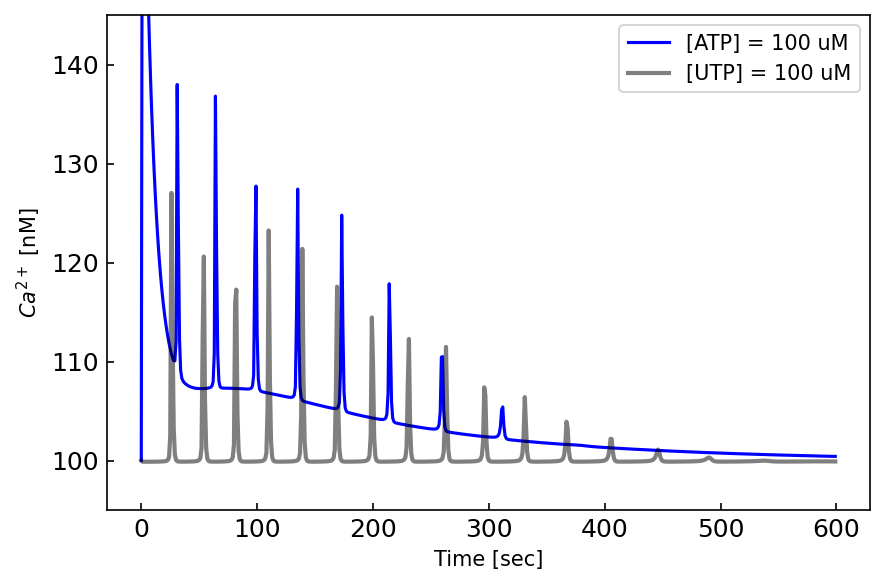

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(rawdata[0][0:600],data_storage_Ca3['100-ATP'][0:600],'b',alpha=1,label='[ATP] = 100 uM')
plt.plot(rawdata[0][0:600],data_storage_Ca3['100-UTP'][0:600],'k',lw=2,alpha=0.5,label='[UTP] = 100 uM')
plt.ylabel('$Ca^{2+}$ [nM]')
plt.xlabel('Time [sec]')
plt.legend(loc=0)
plt.ylim([95,145])
plt.tight_layout()

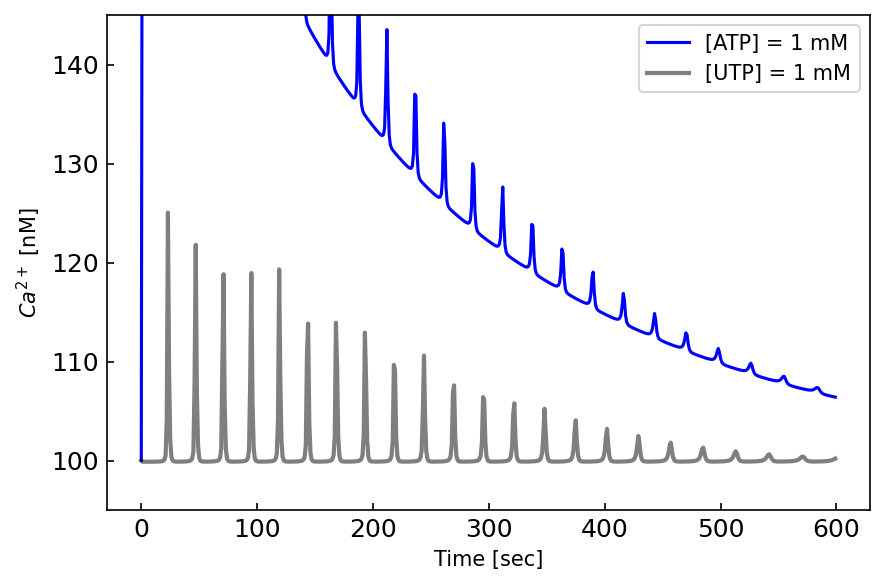

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(rawdata[0][0:600],data_storage_Ca3['1000-ATP'][0:600],'b',alpha=1,label='[ATP] = 1 mM')
plt.plot(rawdata[0][0:600],data_storage_Ca3['1000-UTP'][0:600],'k',lw=2,alpha=0.5,label='[UTP] = 1 mM')
plt.ylabel('$Ca^{2+}$ [nM]')
plt.xlabel('Time [sec]')
plt.legend(loc=0)
plt.ylim([95,145])
plt.tight_layout()

In [ ]:
duration = 1000
data_name = ['100-ATP','1000-ATP', '100-UTP', '1000-UTP']
ATPselec = [100,1000]
data_storage_Ca4 = {}
data_storage_Gprot4 = {}
data_storage_DAG4 = {}

for i,j in enumerate(ATPselec):
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = j,
                                 UTP           = 0,
                                 rhop2x4       = 0,
                                 rhop2x7       = 0,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 0,
                                 SponSwitch    = 0,
                                 removePickle  = 0)
    data_storage_Ca4[data_name[i]] = rawdata[1]
    data_storage_Gprot4[data_name[i]] = rawdata[2]
    data_storage_DAG4[data_name[i]] = rawdata[3]

    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = 0,
                                 UTP           = j,
                                 rhop2x4       = 0,
                                 rhop2x7       = 0,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 0,
                                 SponSwitch    = 0,
                                 removePickle  = 0)
    data_storage_Ca4[data_name[i+2]] = rawdata[1]
    data_storage_Gprot4[data_name[i+2]] = rawdata[2]
    data_storage_DAG4[data_name[i+2]] = rawdata[3]

 -------------- 20.103400468826294 seconds --------------
 ------------ End of Simulation -----------
 -------------- 21.234545946121216 seconds --------------
 ------------ End of Simulation -----------
 -------------- 21.478989124298096 seconds --------------
 ------------ End of Simulation -----------
 -------------- 21.39615559577942 seconds --------------
 ------------ End of Simulation -----------


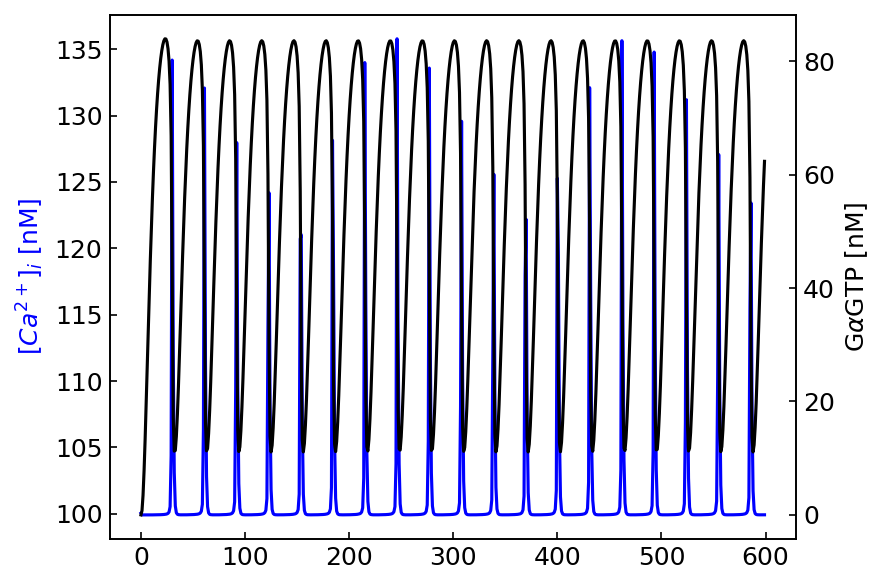

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
ax1 = plt.subplot()
ax1.tick_params(labelsize=12,direction='in')
ax1.plot(rawdata[0][0:600],data_storage_Ca4['100-ATP'][0:600],'b',alpha=1,label='[ATP] = 100 uM')
ax1.set_ylabel('$[Ca^{2+}]_i$ [nM]',fontsize=12,color='blue')
        
ax2 = ax1.twinx()
ax2.tick_params(labelsize=12,direction='in')
ax2.plot(rawdata[0][0:600],data_storage_Gprot4['100-ATP'][0:600],'k',alpha=1,label='[ATP] = 100 uM')
ax2.set_ylabel(r'G$\alpha$GTP [nM]',fontsize=12)
plt.tight_layout()

In [ ]:
duration = 1000
data_name = ['Low','Mid', 'High']
ATPselec = 100
P2Y = [10, 20, 40]
data_storage_Ca5 = {}
data_storage_Gprot5 = {}
data_storage_DAG5 = {}

for i,j in enumerate(P2Y):
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATPselec,
                                 UTP           = 0,
                                 rhop2x4       = 0,
                                 rhop2x7       = 0,
                                 rhop2yc       = 1,
                                 kgcc          = j,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'GaGTPcc',
                                 data_name3    = 'DAGcc',
                                 DegSwitch     = 0,
                                 SponSwitch    = 0,
                                 removePickle  = 0)
    data_storage_Ca5[data_name[i]] = rawdata[1]
    data_storage_Gprot5[data_name[i]] = rawdata[2]
    data_storage_DAG5[data_name[i]] = rawdata[3]

 -------------- 16.283240795135498 seconds --------------
 ------------ End of Simulation -----------
 -------------- 19.553257703781128 seconds --------------
 ------------ End of Simulation -----------
 -------------- 22.040299654006958 seconds --------------
 ------------ End of Simulation -----------


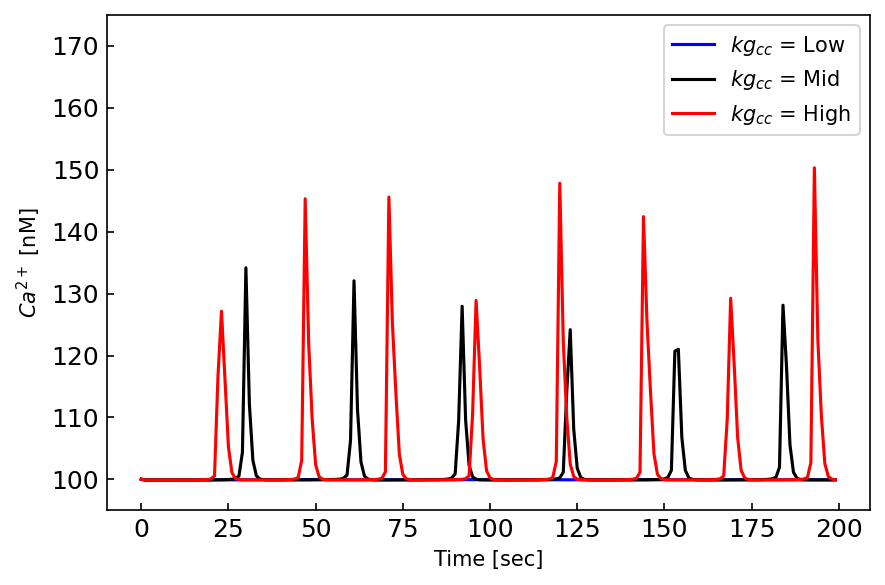

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(rawdata[0][0:200],data_storage_Ca5['Low'][0:200],'b',alpha=1,label=r'$kg_{cc}$ = Low')
plt.plot(rawdata[0][0:200],data_storage_Ca5['Mid'][0:200],'k',alpha=1,label=r'$kg_{cc}$ = Mid')
plt.plot(rawdata[0][0:200],data_storage_Ca5['High'][0:200],'r',alpha=1,label=r'$kg_{cc}$ = High')
plt.ylabel('$Ca^{2+}$ [nM]')
plt.xlabel('Time [sec]')
plt.legend(loc=0)
plt.ylim([95,175])
plt.tight_layout()

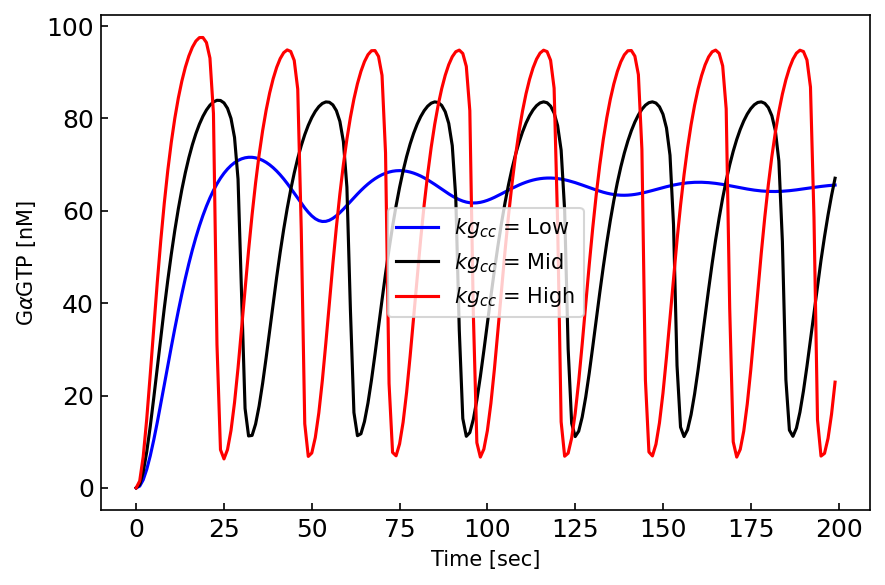

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(rawdata[0][0:200],data_storage_Gprot5['Low'][0:200],'b',alpha=1,label=r'$kg_{cc}$ = Low')
plt.plot(rawdata[0][0:200],data_storage_Gprot5['Mid'][0:200],'k',alpha=1,label=r'$kg_{cc}$ = Mid')
plt.plot(rawdata[0][0:200],data_storage_Gprot5['High'][0:200],'r',alpha=1,label=r'$kg_{cc}$ = High')
plt.ylabel(r'G$\alpha$GTP [nM]')
plt.xlabel('Time [sec]')
plt.legend(loc=0)
#plt.ylim([95,175])
plt.tight_layout()

### Ca transients

#### Experimental Data vs. Simulation 

In [ ]:
noP2X7 = np.array([100.00,104.00,168.80,128.53,121.60,118.93,123.20,116.27,108.80,109.87,107.73,110.67,
                   105.33,109.07,102.93,101.33,105.60,104.00,106.13,104.00,113.87,105.33,104.53,103.20,
                   109.33,106.67,103.20,102.67,104.27,102.40]) 
time1 =  np.array([0.00,0.42,0.61,0.98,1.10,1.33,1.44,1.86,2.05,2.08,2.35,2.54,2.73,2.92,3.33,3.64,3.79,3.98,4.09,4.17,
                   4.58,4.89,5.15,5.42,5.68,5.95,6.14,6.52,6.63,6.86])

lowATP = np.array([100.00,100.53,136.80,178.93,174.93,130.13,107.47,100.53,100.27,100.80,100.27,
                   101.60,101.87,100.53,100.80,100.80,101.33,100.53,102.93])
time2  = np.array([0.00,0.38,0.49,1.02,1.21,1.67,2.16,2.77,3.11,4.24,4.32,4.66,4.89,5.08,5.30,5.49,5.91,6.10,6.40])

All    = np.array([100.00,100.00,175.73,166.13,156.27,161.60,153.60,162.93,155.47,164.53,162.40,163.47,154.40,160.27,
                   151.73,161.60,136.27,157.33,137.07,131.73,134.13,134.13,157.87,131.73,146.93,128.80,129.60,129.07,
                   131.47,151.73,125.87,133.33,125.87,149.60,126.40])
time3  = np.array([0.00,0.42,0.61,0.72,1.06,1.17,1.33,1.48,1.93,2.01,
                   2.16,2.20,2.42,2.50,2.69,2.80,3.18,3.41,3.60,3.83,
                   3.94,4.09,4.28,4.70,5.27,5.80,5.91,6.10,6.29,6.52,
                   7.08,7.50,7.92,8.26,8.79])

In [ ]:
data1  = SR.gotranMicroglia(sim_time      = 600,
                            ATP           = 10,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            rhop2x4       = 1,
                            rhop2x7       = 1,
                            rhop2yc       = 0,
                            rhop2yext     = 1,
                            data_name2    = 'JNCX',
                            data_name3    = 'CaER',
                            data_name4    = 'I_ptxs',
                            data_name5    = 'I_ptxf',
                            EleSwitch     = 0,
                            DegSwitch     = 0,
                            removePickle  = 0)

 -------------- 15.555302143096924 seconds --------------
 ------------ End of Simulation -----------


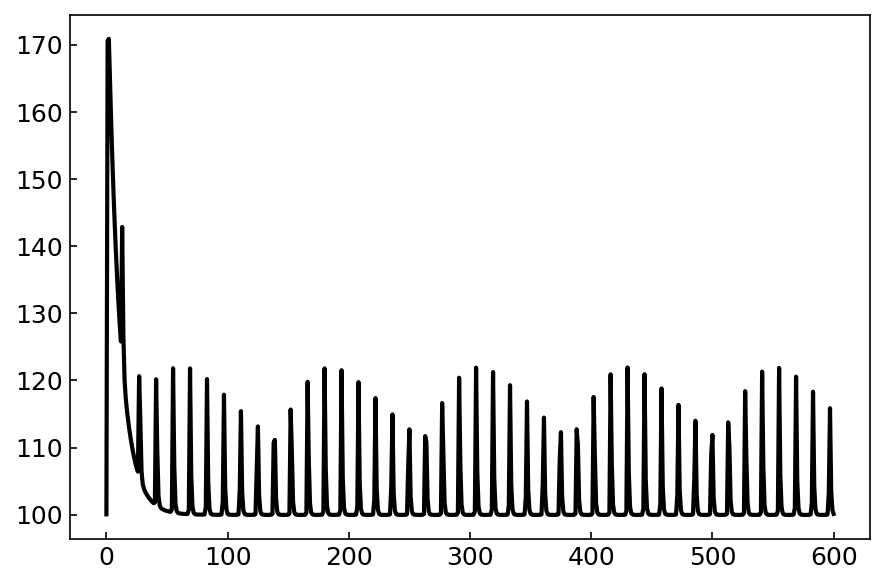

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(data1[0],data1[1],'k',lw=2,label='Sim. Data')
plt.tight_layout()

In [ ]:
duration = 600
CellType = ['WT','P7KO','LowATP']
data_wCD39 = {}
data_woCD39 = {}

for i in np.arange(len(CellType)):
    if CellType[i] == 'WT':
        ATP = 1000
        p2x7 = 1 
    elif CellType[i] == 'P7KO':
        ATP = 1000
        p2x7 = 0
    elif CellType[i] == 'LowATP':
        ATP = 100
        p2x7 = 1
        
    data1  = SR.gotranMicroglia(sim_time      = duration,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = 1,
                                data_name2    = 'CaER',
                                EleSwitch     = 0,
                                DegSwitch     = 1,
                                removePickle  = 0)
    
    data2  = SR.gotranMicroglia(sim_time      = 600,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = 1,
                                data_name2    = 'CaER',
                                EleSwitch     = 0,
                                DegSwitch     = 0,
                                removePickle  = 0)
    
    data_wCD39[CellType[i]] = data1[1]
    data_woCD39[CellType[i]] = data2[1]
    dura = data1[0]
    
CaAll = data_wCD39['WT']
CaNoP7 = data_wCD39['P7KO']
CaAllno = data_woCD39['WT']
CaNoP7no = data_woCD39['P7KO']
CalowATP = data_wCD39['LowATP']
CalowATPno = data_woCD39['LowATP']

 -------------- 15.568207502365112 seconds --------------
 ------------ End of Simulation -----------
 -------------- 16.865248441696167 seconds --------------
 ------------ End of Simulation -----------
 -------------- 16.0164532661438 seconds --------------
 ------------ End of Simulation -----------
 -------------- 17.429895162582397 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.953926086425781 seconds --------------
 ------------ End of Simulation -----------
 -------------- 17.786621809005737 seconds --------------
 ------------ End of Simulation -----------


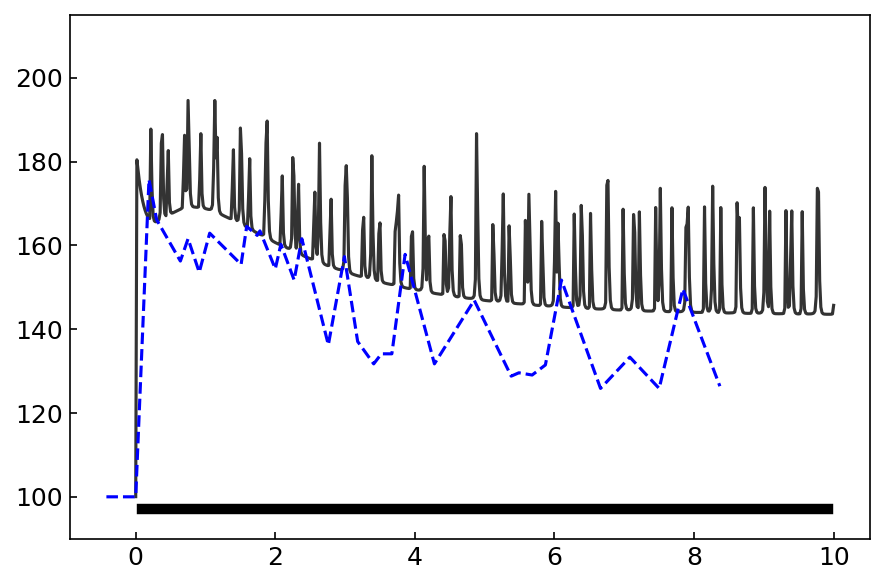

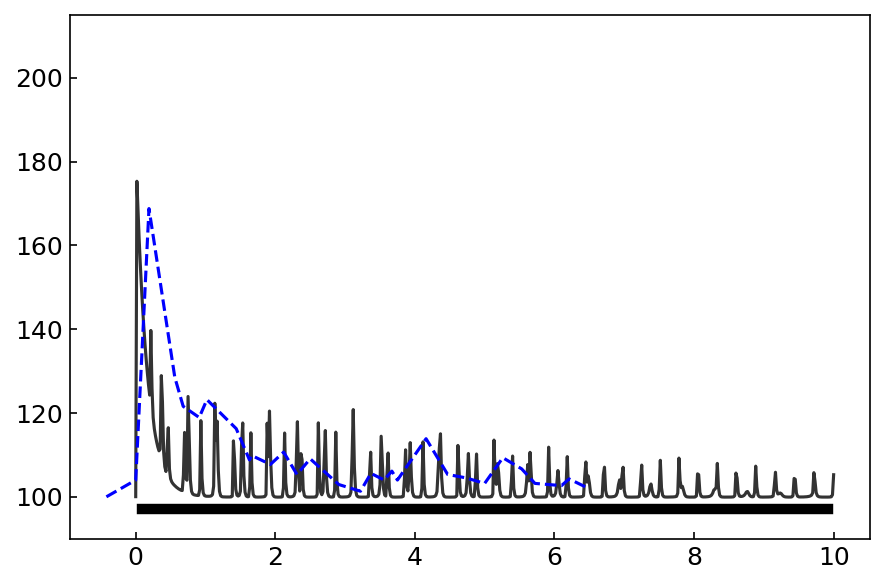

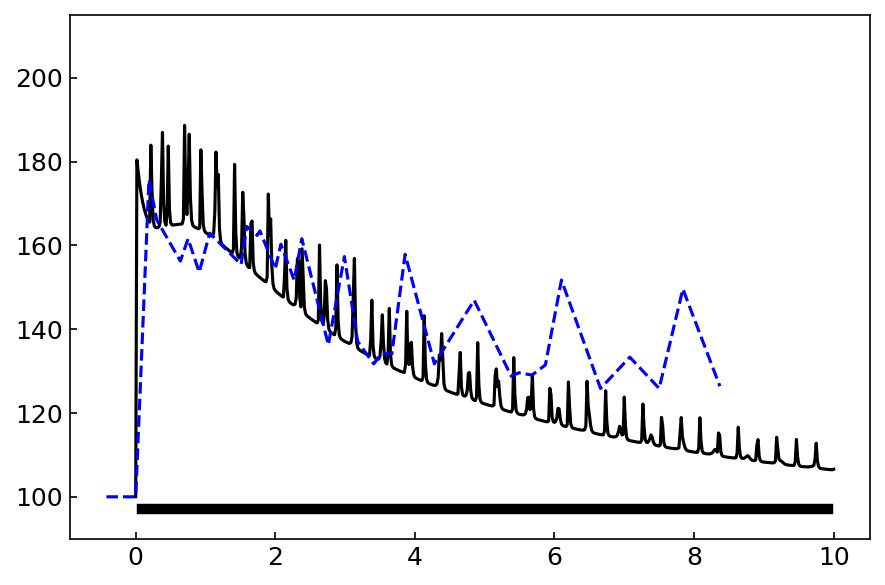

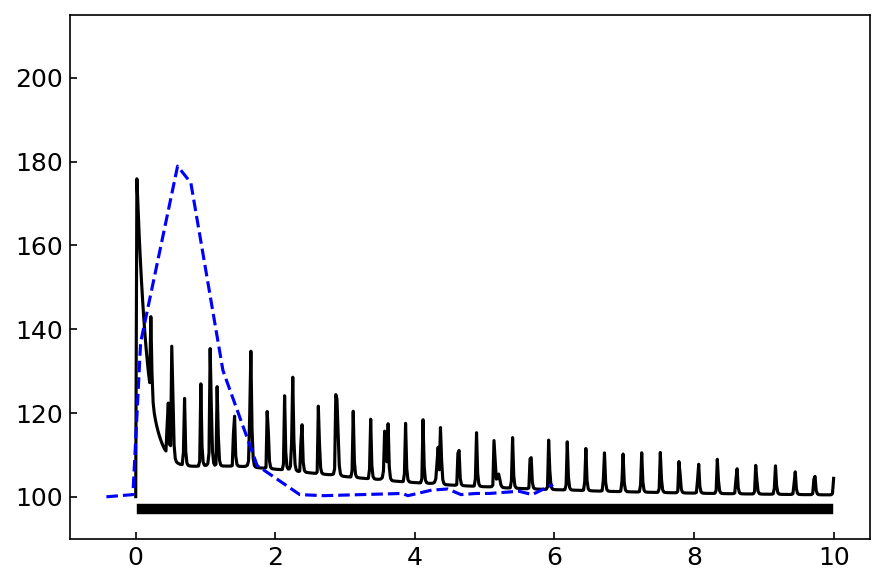

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,CaAllno,'k',lw=1.5,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'b--',lw=1.5,alpha=1,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.ylim([90,215])
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,CaNoP7,'k',lw=1.5,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'b--',lw=1.5,alpha=1,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.ylim([90,215])
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,CaAll,'k',lw=1.5,label='Sim. Data')
plt.plot(time3-0.42,All,'b--',lw=1.5,alpha=1,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.ylim([90,215])
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,CalowATP,'k',lw=1.5,label='Sim. Data')
plt.plot(time2-0.42,lowATP,'b--',lw=1.5,alpha=1,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.ylim([90,215])
plt.tight_layout()

### Freq vs. Elev

In [ ]:
time = 300
counter = 0
Kp = [5.1,5,4.4,4,2.8] #scipy.linspace(5,20,10)
p2x7 = np.linspace(0.01,1,10)
for i in np.arange(len(Kp)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                ATP           = 200,
                                output_name   = 'test1',
                                ode_file_name = odefilename, # 6 works
                                Kdcc          = Kp[i],
                                rhop2x4       = 0,
                                rhop2x7       = 0,
                                rhop2yext     = 0,
                                data_name2    = 'TNFae',
                                data_name3    = 'mRNA_TNF',
                                data_name4    = 'Distance',
                                DegSwitch     = 0,
                                removePickle  = 0)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            entry   = counter
            kp      = Kp[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            kp      = np.append(kp,Kp[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'Kp': kp,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 9.892385244369507 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.13236117362976 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.659207582473755 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.253538846969604 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.495544910430908 seconds --------------
 ------------ End of Simulation -----------


,Kp
0,5.1
1,5.0
2,4.4
3,4.0
4,2.8


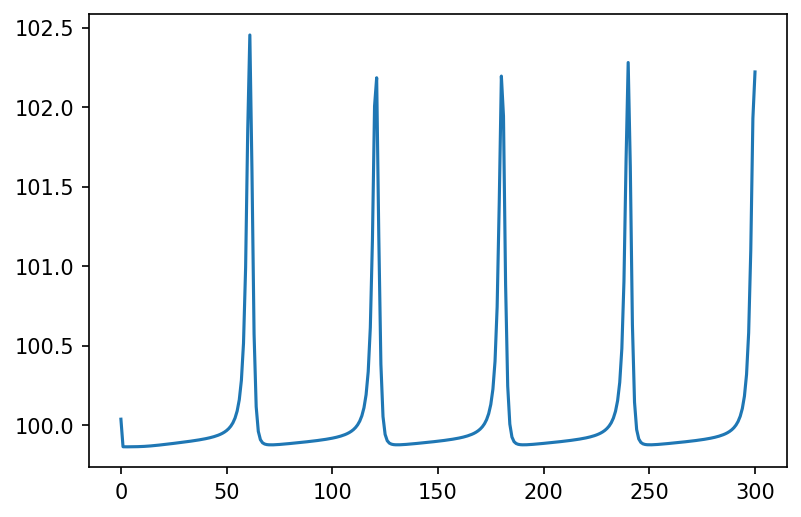

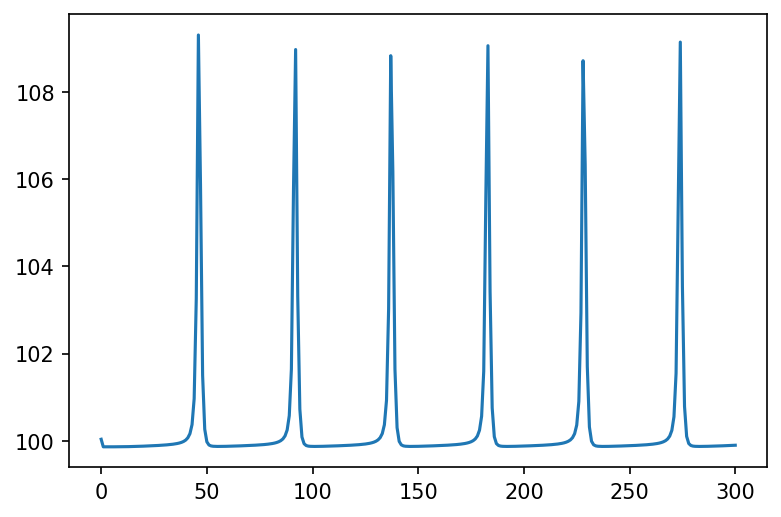

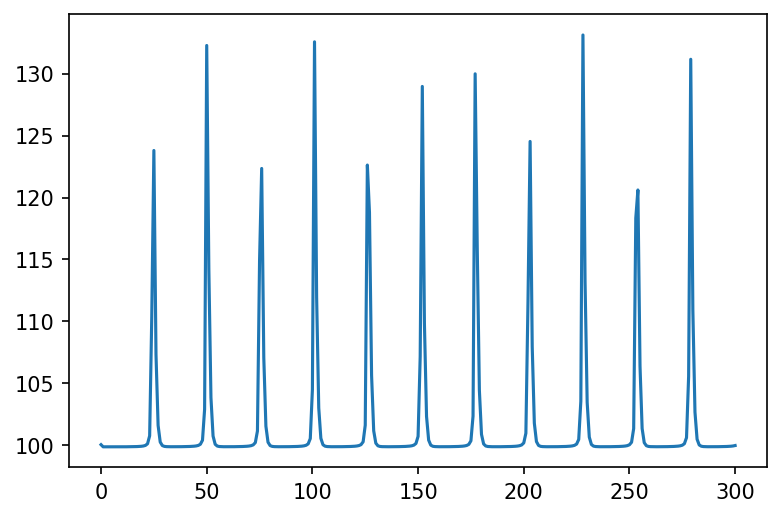

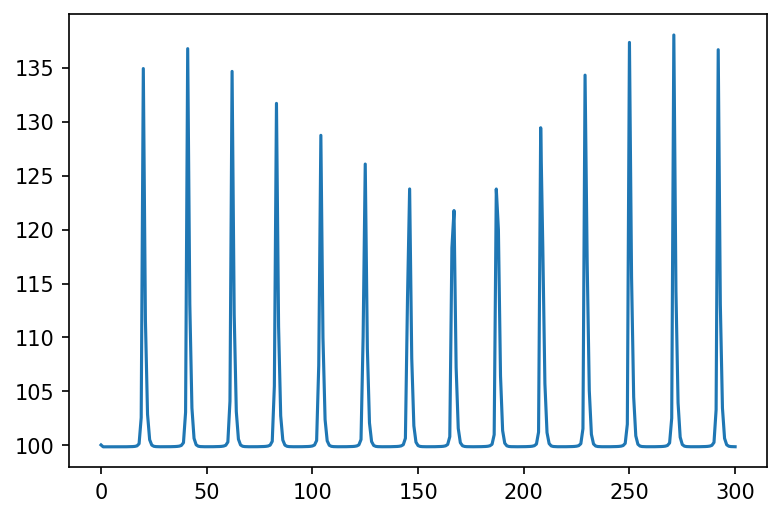

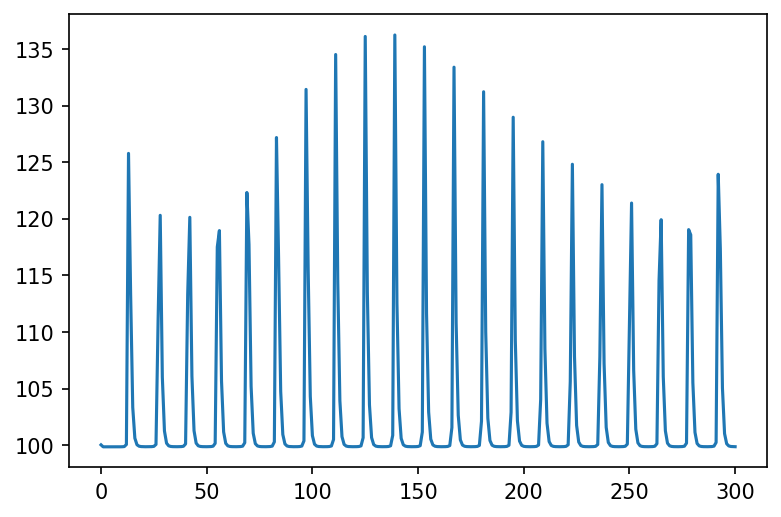

In [ ]:
for i in np.arange(5):
    plt.figure(dpi=150)
    plt.plot(dura, Ca[i],label=str(i))
#plt.legend(loc=0)

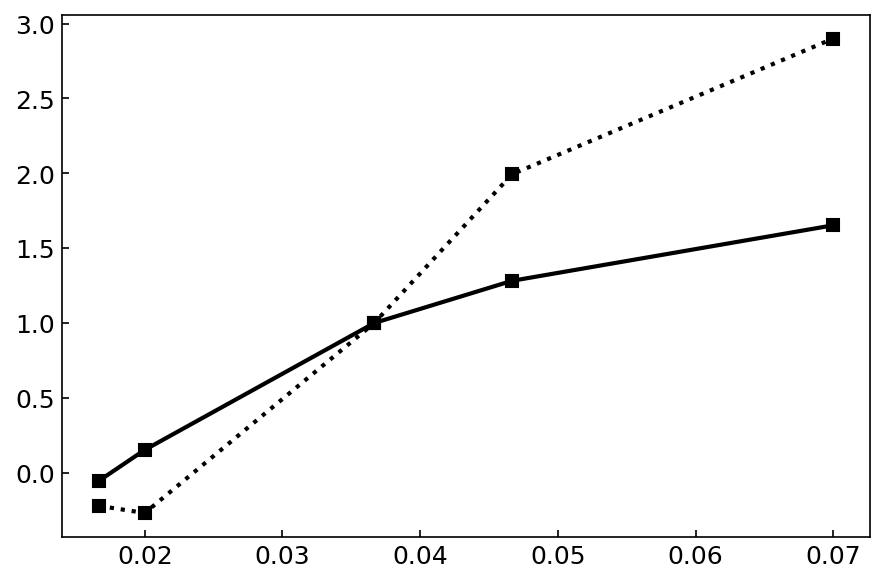

In [ ]:
distdummy = np.zeros(5)
tnfdummy = np.zeros(5)
for i in np.arange(5):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[2]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[2]-tnfe[0][0])

frequency = [5/300,6/300,11/300,14/300,21/300]

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(frequency,dist_data,'ks-',lw=2,alpha=1,label="Migration")
plt.plot(frequency,tnf_data,'ks:',lw=2,alpha=1,label="TNFa")
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("Freq. [Hz]",fontsize=12)
#plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Cafreq.png")

In [ ]:
time = 300
counter = 0
#Kp = [10,15,20,25,30,35,40,45] #scipy.linspace(5,20,10)
p2x7 = [0.1,0.5,1,2,3]
for i in np.arange(len(p2x7)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = odefilename, # 6 works
                                    rhop2x7       = p2x7[i],
                                    rhop2yext     = 0,
                                    rhop2yc       = 0,
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'Distance',
                                    DegSwitch     = 0,
                                    removePickle  = 0)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            entry   = counter
            p2x7z      = p2x7[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            p2x7z      = np.append(p2x7z,p2x7[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'p2x7': p2x7,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 9.922286033630371 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.952156066894531 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.89713978767395 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.875271320343018 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.069536209106445 seconds --------------
 ------------ End of Simulation -----------


,p2x7
0,0.1
1,0.5
2,1.0
3,2.0
4,3.0


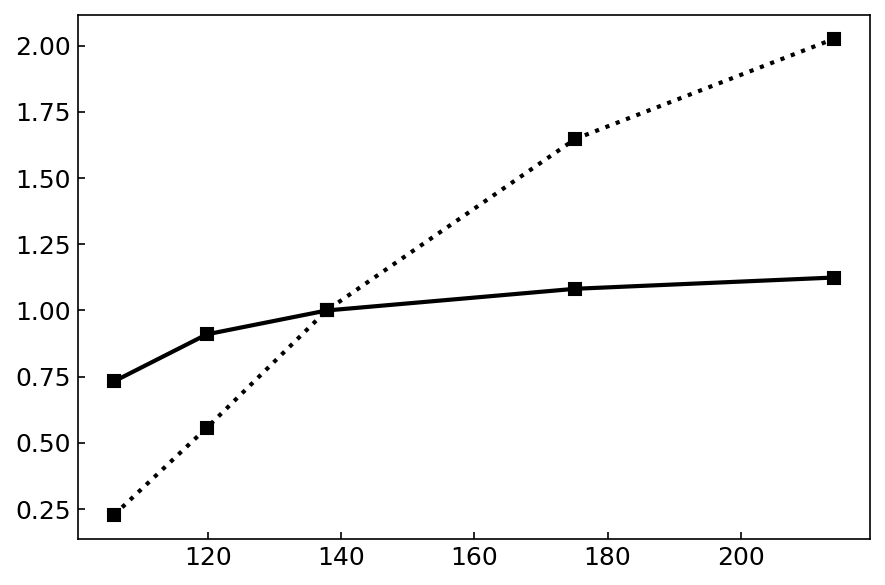

In [ ]:
Ca_elev = np.zeros(5)
for i in np.arange(5):
    Ca_elev[i] = np.average(Ca[i][0:300])

distdummy = np.zeros(5)
tnfdummy = np.zeros(5)
for i in np.arange(5):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[2]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[2]-tnfe[0][0])

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(Ca_elev,dist_data,'ks-',lw=2,alpha=1,label="Migration")
plt.plot(Ca_elev,tnf_data,'ks:',lw=2,alpha=1,label="TNFa")
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("$[Ca^{2+}]_i$. [nM]",fontsize=12)
#plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Caelev.png")

#### Ca transients - ER

In [ ]:
duration = 600
CellType = ['WT-low','KO-low','WT','KO']
data_Ca_Cy = {}
data_Ca_ER = {}

for i in np.arange(len(CellType)):
    if CellType[i] == 'WT-low':
        ATP = 100
        p2x4 = 1
        p2x7 = 1
    elif CellType[i] == 'KO-low':
        ATP = 100
        p2x4 = 0
        p2x7 = 0        
    elif CellType[i] == 'WT':
        ATP = 1000
        p2x4 = 1
        p2x7 = 1
    elif CellType[i] == 'KO':
        ATP = 1000
        p2x4 = 0
        p2x7 = 0

    data   =  SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = p2x4,
                                 rhop2x7       = p2x7,
                                 rhop2yc       = 1,
                                 data_name2    = 'CaER',
                                 #data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data_Ca_Cy[CellType[i]] = data[1]
    data_Ca_ER[CellType[i]] = data[2]
    dura = data[0]
    
Ca2 = data_Ca_Cy['KO-low']
Ca3 = data_Ca_Cy['KO']
Ca4 = data_Ca_Cy['WT-low']
Ca5 = data_Ca_Cy['WT']
caer2 = data_Ca_ER['KO-low']
caer3 = data_Ca_ER['KO']
caer4 = data_Ca_ER['WT-low']
caer5 = data_Ca_ER['WT']
    

 -------------- 15.951074600219727 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.436330795288086 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.779253005981445 seconds --------------
 ------------ End of Simulation -----------
 -------------- 16.222646951675415 seconds --------------
 ------------ End of Simulation -----------


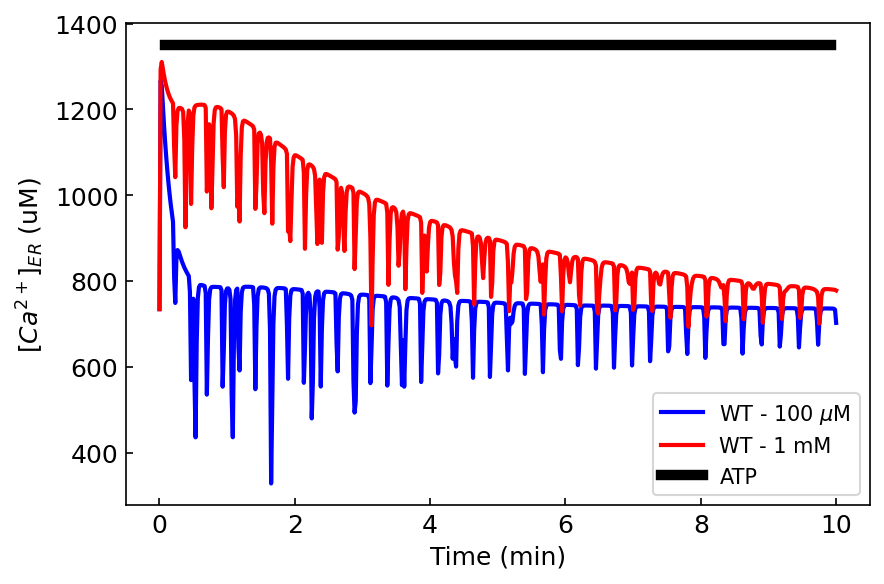

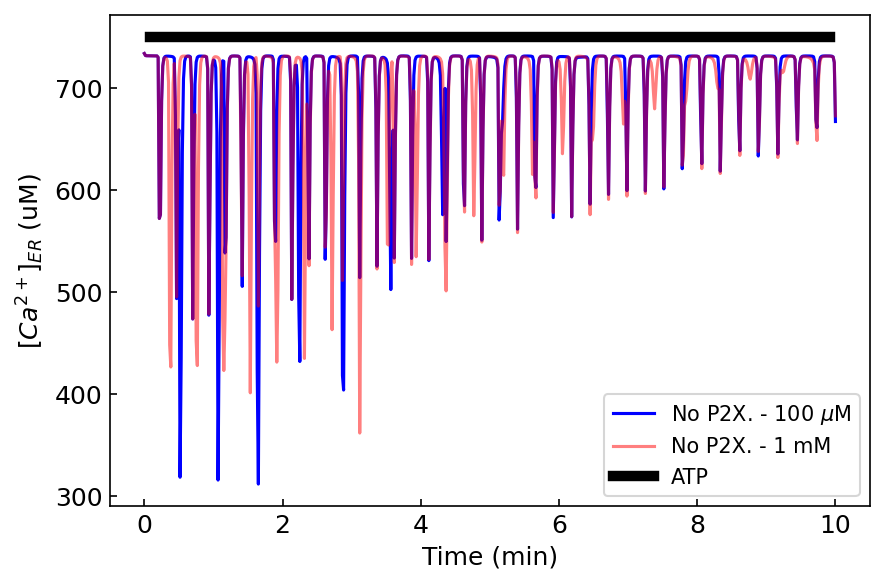

In [ ]:
#plt.figure(figsize=(6,4),dpi=150)
#plt.tick_params(labelsize=12,direction='in')
#plt.plot(dura/60,Ca4,'b-',lw=2,alpha=1,label='WT - 100 $\mu$M')
#plt.plot(dura/60,Ca5,'r-',lw=2,alpha=1,label='WT - 1 mM')
#plt.plot(dura/60,Ca2,'b-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 100 $\mu$M')
#plt.plot(dura/60,Ca3,'r-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 1 mM')
#plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
#plt.xlabel('Time (min)',fontsize=12)
#plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
#plt.legend(fontsize=10,loc=0, ncol=1)
#plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,caer4/1000,'b-',lw=2,alpha=1,label='WT - 100 $\mu$M')
plt.plot(dura/60,caer5/1000,'r-',lw=2,alpha=1,label='WT - 1 mM')
#plt.plot(dura/60,caer2/1000,'b-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 100 $\mu$M')
#plt.plot(dura/60,caer3/1000,'r-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 1 mM')
plt.plot([5/60,595/60],[1350,1350],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_{ER}$ (uM)',fontsize=12)
plt.legend(fontsize=10,loc=0, ncol=1)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(dura/60,caer4/1000,'b-',lw=2,alpha=1,label='WT - 100 $\mu$M')
#plt.plot(dura/60,caer5/1000,'r-',lw=2,alpha=1,label='WT - 1 mM')
plt.plot(dura/60,caer2/1000,'b-',lw=1.5,alpha=1,label='No P2X. - 100 $\mu$M')
plt.plot(dura/60,caer3/1000,'r-',lw=1.5,alpha=0.5,label='No P2X. - 1 mM')
plt.plot([5/60,595/60],[750,750],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_{ER}$ (uM)',fontsize=12)
plt.legend(fontsize=10,loc=0, ncol=1)
plt.tight_layout()

#### BV2 Model vs. Experiment

In [ ]:
duration = 600

exprP2  = {'acute':1/11.1,'prime':1,'bv':1}
exprP4  = {'acute':1/2.95,'prime':1,'bv':0.187}
exprP7  = {'acute':2.65,'prime':1,'bv':0.65}
ATP = [0,50,100,500,1000]
data_prime = {}
data_bv = {}
data_acute = {}

for i in np.arange(len(ATP)):
    data1   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['prime'],
                                 rhop2x7       = exprP7['prime'],
                                 rhop2yc       = exprP2['prime'],
                                 rhop2yext     = exprP2['prime'],
                                 data_name2    = 'CaER',
                                 #data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data2   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['bv'],
                                 rhop2x7       = exprP7['bv'],
                                 rhop2yc       = exprP2['bv'],
                                 rhop2yext     = exprP2['bv'],
                                 data_name2    = 'CaER',
                                 #data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data3   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['acute'],
                                 rhop2x7       = exprP7['acute'],
                                 rhop2yc       = exprP2['acute'],
                                 data_name2    = 'CaER',
                                 #data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data_prime[str(ATP[i])] = data1[1]
    data_bv[str(ATP[i])] = data2[1]
    data_acute[str(ATP[i])] = data3[1]
    


dura=data1[0]
data =[data_bv['0'],data_bv['50'],data_bv['100'],data_bv['500'],data_bv['1000']]
datap =[data_prime['0'],data_prime['50'],data_prime['100'],data_prime['500'],data_prime['1000']]
dataac =[data_acute['0'],data_acute['50'],data_acute['100'],data_acute['500'],data_acute['1000']]

 -------------- 15.791967630386353 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.736222743988037 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.916865587234497 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.611933469772339 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.402906894683838 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.826117992401123 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.760398387908936 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.872355222702026 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.325073480606079 seconds --------------
 ------------ End of Simulation -----------
 -------------- 15.80201244354248 seconds --------------
 ------------ End of Simu

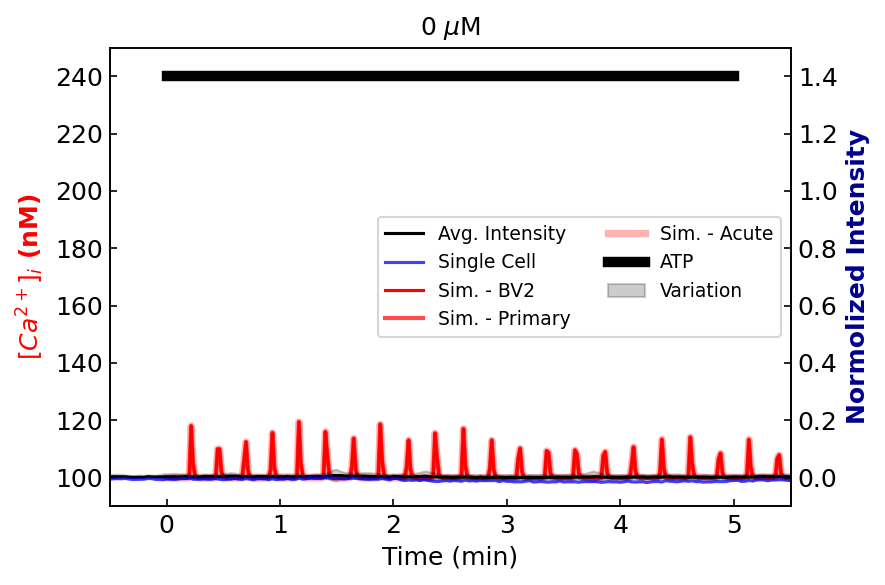

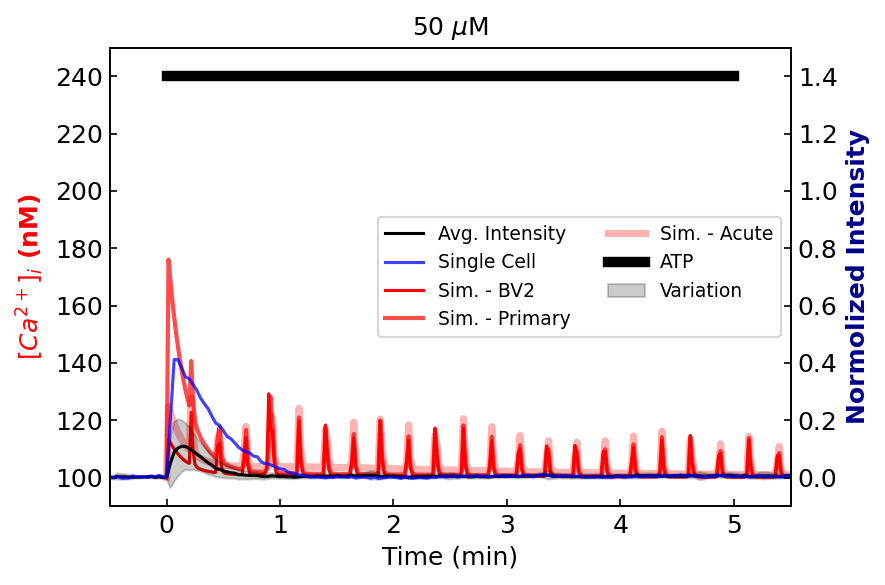

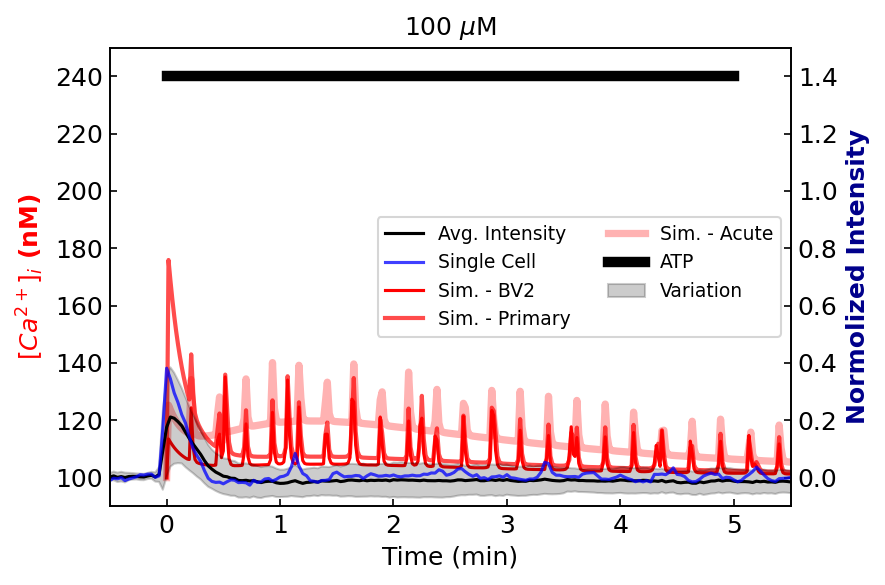

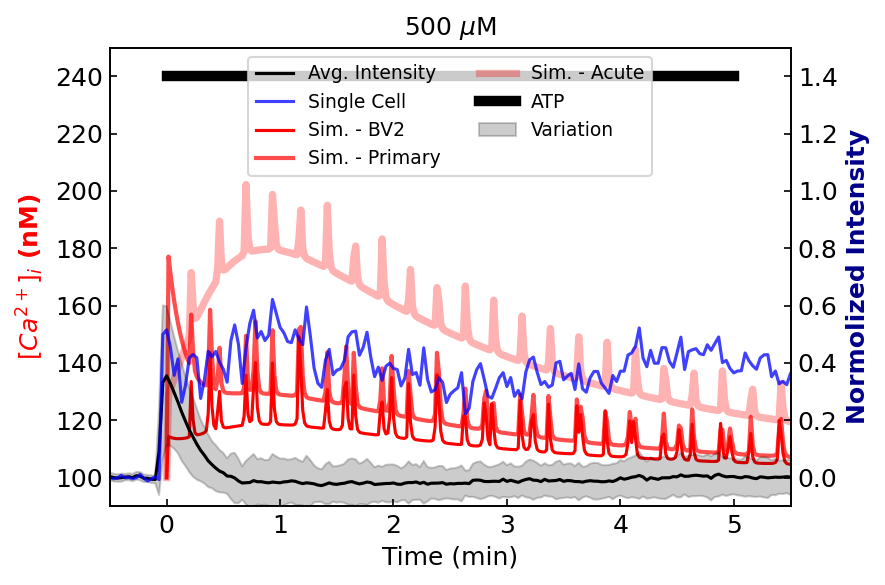

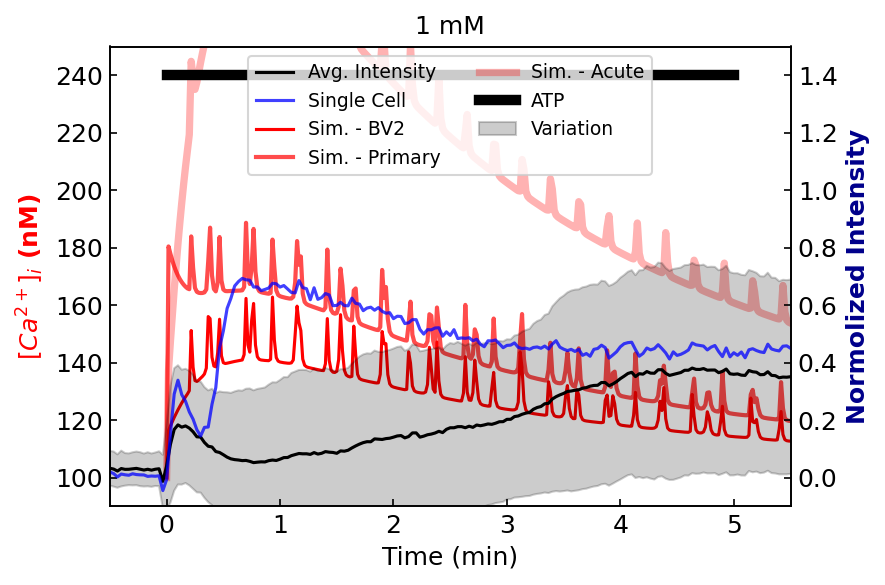

In [ ]:
case=["0uM","50uM","100uM","500uM","1mM"]

#read in the traces
with open('expt/all_traces_BV0629','rb') as f:
    all_traces = pickle.load(f)
with open('expt/Normolized_traces_BV0629','rb') as f:
    normalize_traces = pickle.load(f)

    
# calculate the average trace of each case and plot the std as shaded area
# first, for each case, stack the traces vertically, please search np.vstack to understand this step
stacked_traces = dict()
for i in case:
    temp = normalize_traces[i][0]
    for j in np.arange(1,len(normalize_traces[i])):
        temp = np.vstack((temp,normalize_traces[i][j]))
    stacked_traces[i] = temp
    
    
# get the mean and std for each case
meanTrace = dict()
std = dict()
for i in case:
    meanTrace[i] = np.mean(stacked_traces[i],axis=0)
    std[i] = np.std(stacked_traces[i],axis=0)
    
data1a = normalize_traces["0uM"][1]
data2a = normalize_traces["50uM"][19]
data3a = normalize_traces["100uM"][22]
data4a = normalize_traces["500uM"][31]
data5a = normalize_traces["1mM"][38]
dataa = [data1a, data2a, data3a, data4a, data5a]  

#plt.figure(figsize=(12,12),dpi=150)
Case = ['0 uM', '50 uM', '100 uM', '500 uM', '1 mM']
Case2 = ['0 $\mu$M', '50 $\mu$M', '100 $\mu$M', '500 $\mu$M', '1 mM']
for i,j in enumerate(case):
    color1 = 'red'
    color2 = 'darkblue'
    plt.figure(figsize=(6,4),dpi=150)
    ax1 = plt.subplot()
    #ax1 = plt.subplot(3,2,i+1)
    ax1.tick_params(labelsize=12,direction='in')
    ax1.plot(dura/60,data[i],'r',lw=1.5)
    ax1.plot(dura/60,datap[i],'r',lw=2,alpha=0.7)
    ax1.plot(dura/60,dataac[i],'r',lw=3.5,alpha=0.3)
    ax1.set_ylim([90,250])
    ax1.set_xlim([-0.5,5.5])
    ax1.set_ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12,color=color1,alpha=1,fontweight='bold')
        
    ax2 = ax1.twinx()
    ax2.tick_params(labelsize=12,direction='in')
    x = np.arange(len(meanTrace[j]))
    y = meanTrace[j]/10000
    ax2.plot(x*2/60-10,y,'k-',lw=1.5,label='Avg. Intensity')
    ax2.plot(x*2/60-10,dataa[i]/10000,'b-',lw=1.5,alpha=0.75,label='Single Cell')
    ax2.fill_between(x*2/60-10, y-std[j]/10000, y+std[j]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
    ax2.plot([100],[100],'r',lw=1.5,label='Sim. - BV2')
    ax2.plot([100],[100],'r',lw=2,alpha=0.7,label='Sim. - Primary')
    ax2.plot([100],[100],'r',lw=3.5,alpha=0.3,label='Sim. - Acute')
    ax2.set_ylim([-0.1,1.5])
    ax2.set_xlim([-0.5,5.5])
    ax2.plot([0,5],[1.4,1.4],'k-',lw=5,label='ATP')
    ax2.set_ylabel("Normolized Intensity",fontsize=12,color=color2,alpha=1,fontweight='bold')
        
    ax1.set_xlabel('Time (min)',fontsize=12)
    plt.legend(loc='best',fontsize=9,ncol=2)
    plt.title(Case2[i],fontsize=12)
    plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor rele

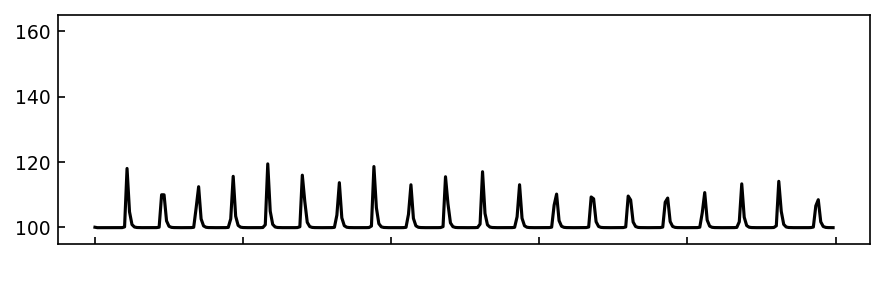

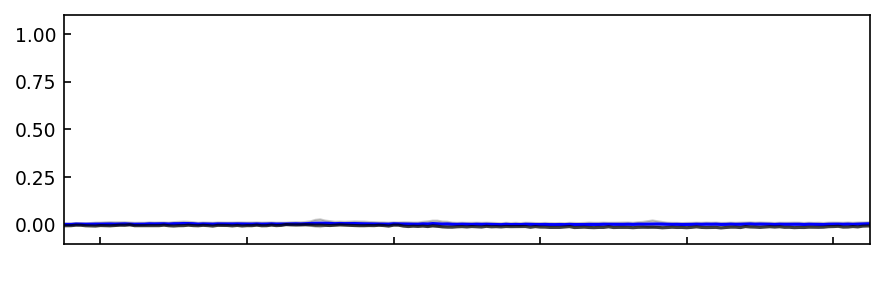

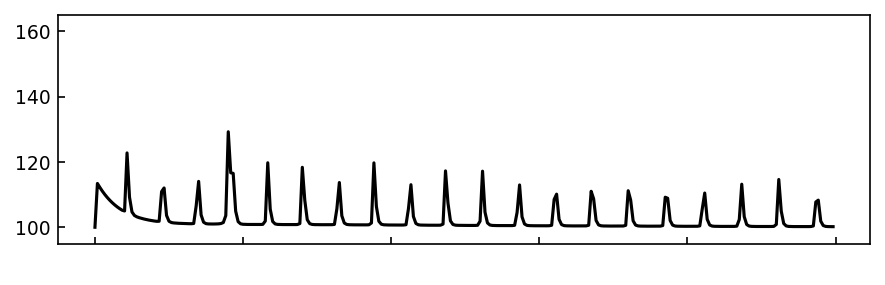

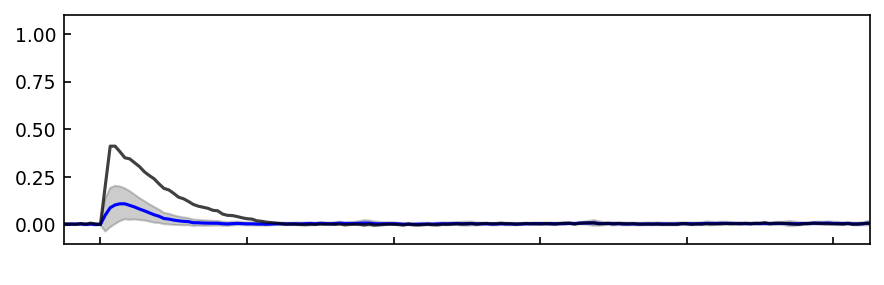

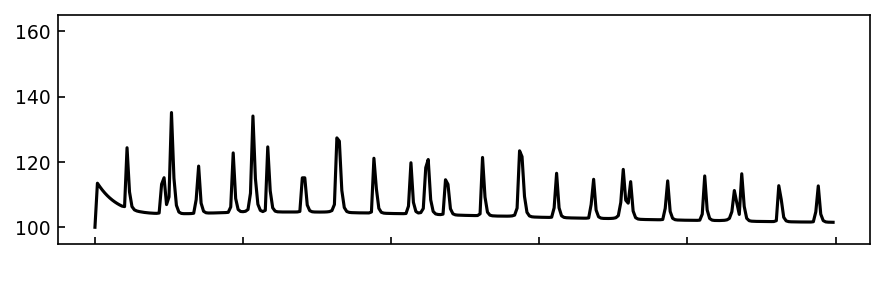

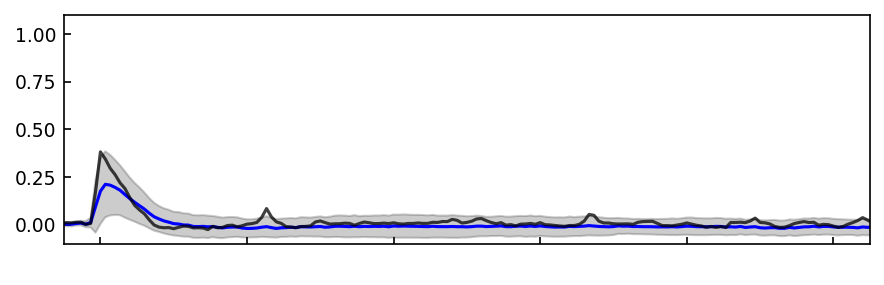

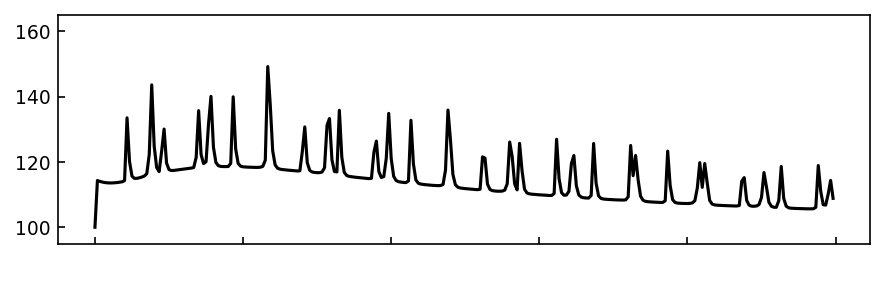

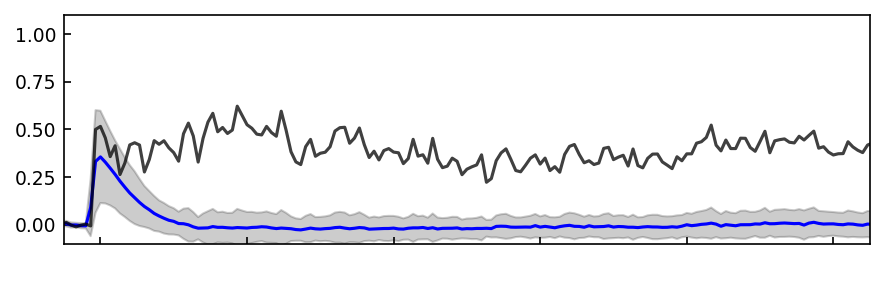

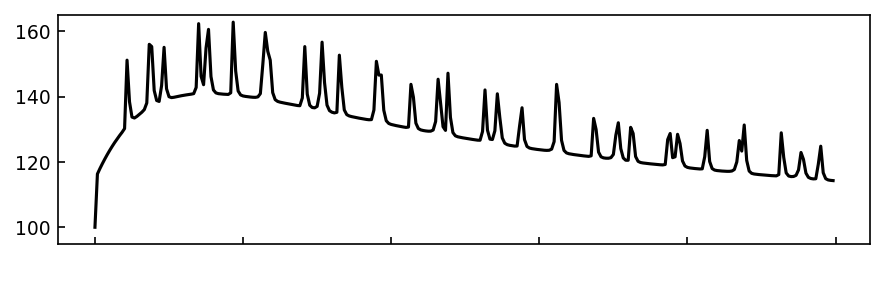

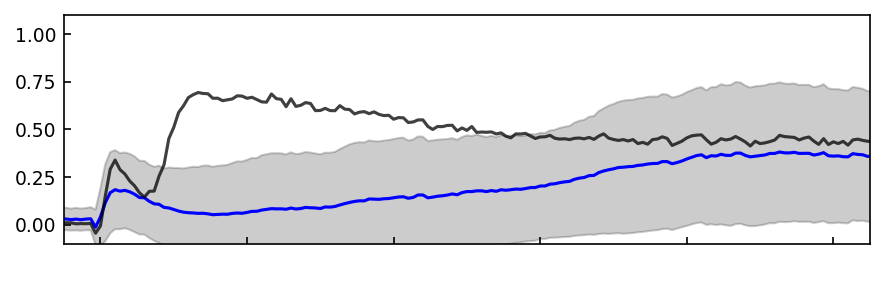

In [ ]:
#plt.figure(figsize=(12,12),dpi=150)
case=["0uM","50uM","100uM","500uM","1mM"]
Case = ['0 uM', '50 uM', '100 uM', '500 uM', '1 mM']
Case2 = ['0 $\mu$M', '50 $\mu$M', '100 $\mu$M', '500 $\mu$M', '1 mM']


color1 = 'red'
color2 = 'darkblue'
for i,j in enumerate(case):
    plt.figure(figsize=(6,2),dpi=150)
    plt.tick_params(labelsize=9,direction='in')
    plt.plot(dura[0:300]/60,data[i][0:300],'k',lw=1.5,label='Sim - BV2')
    plt.ylim([95,165])
    plt.xticks([0,1,2,3,4,5]," ")
    plt.tight_layout()#(pad=0.01)


    #plt.figure(figsize=(6,2),dpi=150)
    #ax = plt.subplots()
    #plt.tick_params(labelsize=9,direction='in')
    #plt.plot(dura[0:300]/60,datap[i][0:300],'k',lw=1.5,label='Sim - Primary')
    #plt.subplots_adjust(hspace = 0.01)
    #plt.ylim([90,230])
    #plt.xticks([0,1,2,3,4,5]," ")
    #plt.tight_layout()#(pad=0.01)

    plt.figure(figsize=(6,2),dpi=150)
    x = np.arange(len(meanTrace[case[i]]))
    y = meanTrace[case[i]]/10000
    ax1 = plt.subplot()
    ax1.tick_params(labelsize=9,direction='in')
    #ax2 = ax1.twinx()
    #ax2.tick_params(labelsize=9,direction='in')
    #ax2.plot(dura[0:300]/60,data[i][0:300],'g',lw=1.5,label='Sim - BV2')
    ax1.plot(x*2/60-10,y,'b-',lw=1.5,label='Avg. Intensity (Expt.)')
    ax1.plot(x*2/60-10,dataa[i]/10000,'k-',lw=1.5,alpha=0.75,label='Single Cell')
    ax1.fill_between(x*2/60-10, y-std[case[i]]/10000, y+std[case[i]]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
    ax1.set_ylim([-0.1,1.1])
    ax1.set_xlim([-0.25,5.25])
    ax1.set_xticks([0,1,2,3,4,5]," ")
    #ax2.set_ylim([90,230])
    plt.xticks([0,1,2,3,4,5]," ")
    plt.tight_layout()#pad=0.01)


In [ ]:
p2y = [0,1]
deg = [0,1]
atp = [10,100,1000]
counter = 0
duration = 300

for a in np.arange(len(atp)):
    for p in np.arange(len(p2y)):
        for d in np.arange(len(deg)):
            data     = SR.gotranMicroglia(sim_time      = duration,
                                          ATP           = atp[a],
                                          output_name   = 'test1',
                                          ode_file_name = odefilename,
                                          rhop2yc       = p2y[p],
                                          rhop2yext     = p2y[p],
                                          data_name2    = 'DNA_TNF',
                                          data_name3    = 'DNATNF',
                                          data_name4    = 'mRNA_TNF',
                                          data_name5    = 'TNFae',
                                          DegSwitch     = deg[d],
                                          removePickle  = 1)
            if counter == 0:
                dura    = data[0]
                mrna    = data[4]
                tnfa    = data[5]
            else:
                tnfa    = np.vstack([tnfa,data[5]])
                mrna    = np.vstack([mrna,data[4]])
                              
            counter = counter + 1



 -------------- 10.008315324783325 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.841306686401367 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.996081113815308 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.787307262420654 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.939159393310547 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.81495976448059 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.383855104446411 seconds --------------
 ------------ End of Simulation -----------
 -------------- 12.856505632400513 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.019642114639282 seconds --------------
 ------------ End of Simulation -----------
 -------------- 9.870669841766357 seconds --------------
 ------------ End of Simulati

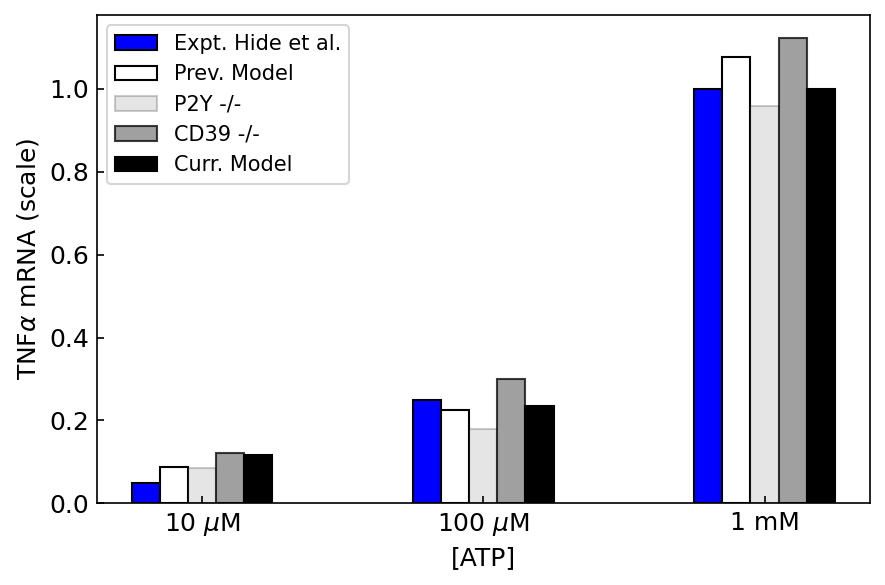

In [ ]:
bar_width = 0.1
space = bar_width/2

prev = (np.array([mrna[0][-1], mrna[4][-1], mrna[8][-1]]) - mrna[0][0])/(mrna[11][-1]-mrna[1][0])
curr = (np.array([mrna[3][-1], mrna[7][-1], mrna[11][-1]]) - mrna[3][0])/(mrna[11][-1]-mrna[1][0])
nocd = (np.array([mrna[2][-1], mrna[6][-1], mrna[10][-1]]) - mrna[2][0])/(mrna[11][-1]-mrna[1][0])
nopy = (np.array([mrna[1][-1], mrna[5][-1], mrna[9][-1]]) - mrna[1][0])/(mrna[11][-1]-mrna[1][0])
exp = [0.05,0.25,1]

objects = ('10 $\mu$M','100 $\mu$M','1 mM')
y_pos = np.arange(len(objects))

plt.figure(figsize=(6,4),dpi=150)
plt.bar(y_pos-space*4, exp,  bar_width, align='center', color='blue', alpha=1, edgecolor='black',label='Expt. Hide et al.')
plt.bar(y_pos-space*2, prev, bar_width, align='center', color='white', alpha=1, edgecolor='black',label='Prev. Model')
plt.bar(y_pos-space*0, nopy, bar_width, align='center', color='gray', alpha=0.2, edgecolor='black',label='P2Y -/-')
plt.bar(y_pos+space*2, nocd, bar_width, align='center', color='gray', alpha=0.75, edgecolor='black',label='CD39 -/-')
plt.bar(y_pos+space*4, curr, bar_width, align='center', color='black', alpha=1, edgecolor='black',label='Curr. Model')

plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'TNF$\alpha$ mRNA (scale)',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()


#### Akt valdiation

In [ ]:
ATP = np.array([10,50,100,1000])
time = 300
counter = 0
p2x4 = np.array([1])
p2x7 = np.array([1])
p2yc = np.array([1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                elif p2x4[j] == 0 and p2x7[k] == 0:
                    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                                ATP           = ATP[i],
                                                output_name   = 'test1',
                                                ode_file_name = odefilename,
                                                rhop2x4       = p2x4[j],
                                                rhop2x7       = p2x7[k],
                                                rhop2yc       = p2yc[l],
                                                kf5_p2y12     = 0.001,
                                                data_name2    = 'pAkt',
                                                DegSwitch     = 1,
                                                removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        pAkt    = data[2]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        py      = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        pAkt    = np.vstack([pAkt,data[2]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        py      = np.append(py,p2yc[l])
                              
                    counter = counter + 1
                
data   = SR.gotranMicroglia(sim_time      = time,
                            ATP           = 50,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            kf5_p2y12     = 0.001,
                            data_name2    = 'pAkt',
                            DegSwitch     = 0,
                            removePickle  = 1) 

pAkt = np.vstack([pAkt,data[2]])

 -------------- 10.847011804580688 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.773231506347656 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.583503484725952 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.635737419128418 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.85440182685852 seconds --------------
 ------------ End of Simulation -----------


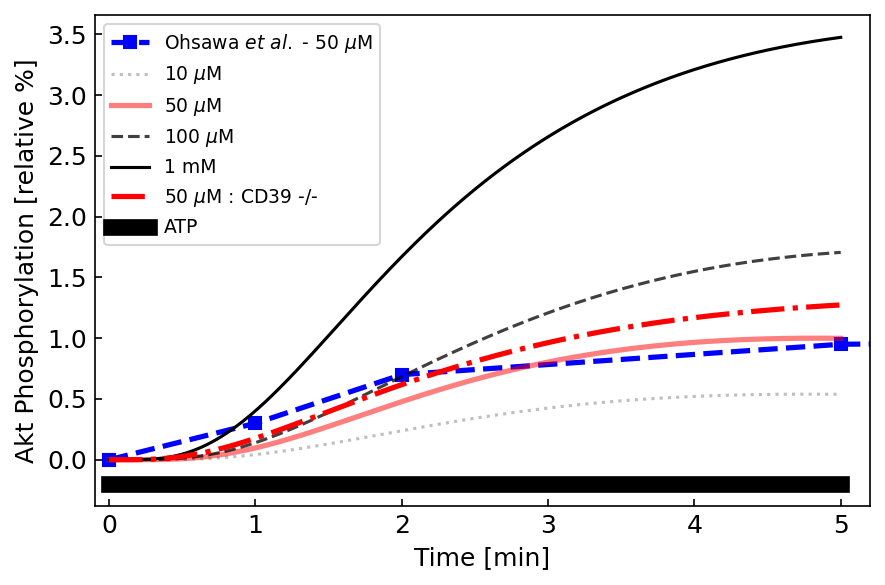

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
time = [0,1,2,5,10]
plt.plot(time,[0,0.3,0.7,0.95,1],'b--s',linewidth=2.5,alpha=1,label='Ohsawa $et$ $al.$ - 50 $\mu$M')
plt.tight_layout()
plt.plot(dura/60,pAkt[0]/max(pAkt[1]),'k:',linewidth=1.5,alpha=0.25,label="10 $\mu$M")
plt.plot(dura/60,pAkt[1]/max(pAkt[1]),'r',linewidth=2.5,alpha=0.5,label="50 $\mu$M")
plt.plot(dura/60,pAkt[2]/max(pAkt[1]),'k--',linewidth=1.5,alpha=0.75,label="100 $\mu$M")
plt.plot(dura/60,pAkt[3]/max(pAkt[1]),'k-',linewidth=1.5,alpha=1,label="1 mM")
plt.plot(dura/60,pAkt[4]/max(pAkt[1]),'r-.',linewidth=2.5,alpha=1,label="50 $\mu$M : CD39 -/-")
plt.plot(dura/60,np.ones(len(dura))*(-0.2),'k-',lw=8,alpha=1,label='ATP')
plt.legend(loc=0,fontsize=9)
plt.xlabel("Time [min]",fontsize=12)
plt.ylabel("Akt Phosphorylation [relative %]",fontsize=12)
plt.xlim([-0.1,5.2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)


#### Migration validation against Ohsawa et al (2002)

In [ ]:
ATP = np.array([50])
time = 300
counter = 0
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                #elif p2x4[j] == 0 and p2x7[k] == 0:
                #    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                            ATP           = ATP[i],
                                            output_name   = 'test1',
                                            ode_file_name = odefilename,
                                            rhop2x4       = p2x4[j],
                                            rhop2x7       = p2x7[k],
                                            rhop2y12      = p2yc[l],
                                            rhop2yext     = 1,
                                            data_name2    = 'Q12_ptxf',
                                            data_name3    = 'Gb',
                                            data_name4    = 'PI3Ka',
                                            data_name5    = 'pAkt',
                                            data_name6    = 'Distance',
                                            DegSwitch     = 1,
                                            removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        Q12     = data[2]
                        Gb      = data[3]
                        pi3ka   = data[4]
                        pakt    = data[5]
                        p2y12   = data[6]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        p12     = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        Q12     = np.vstack([Q12,data[2]])
                        Gb      = np.vstack([Gb,data[3]])
                        pi3ka   = np.vstack([pi3ka,data[4]])
                        pakt    = np.vstack([pakt,data[5]])
                        p2y12   = np.vstack([p2y12,data[6]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        p12     = np.append(p12,p2yc[l])
                              
                    counter = counter + 1
    
import pandas as pd 

data = {
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Y12': p12
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 10.909609079360962 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.713706254959106 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.77716612815857 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.977942705154419 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.706008911132812 seconds --------------
 ------------ End of Simulation -----------


,ATP in uM,P2X4,P2X7,P2Y12
0,50,0,0,1
1,50,0,1,1
2,50,1,0,1
3,50,1,1,0
4,50,1,1,1


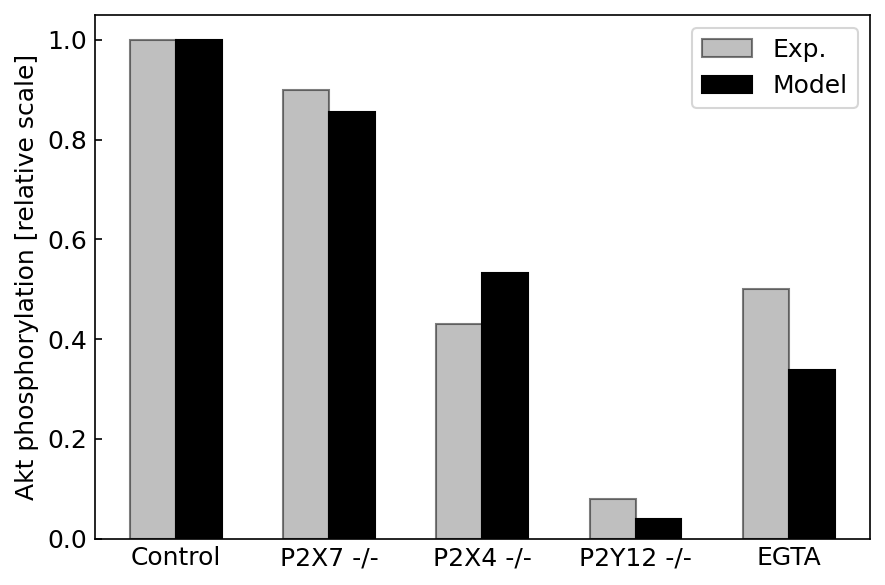

In [ ]:
data = np.array([pakt[4][300],pakt[2][300],pakt[1][300],pakt[3][300],pakt[0][300]])
ratio = data/max(data)
expratio = np.array([100,90,43,8,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

y_pos = np.arange(len(objects))
bar_width = 0.3
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,1)
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, ratio, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Akt phosphorylation [relative scale]',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()


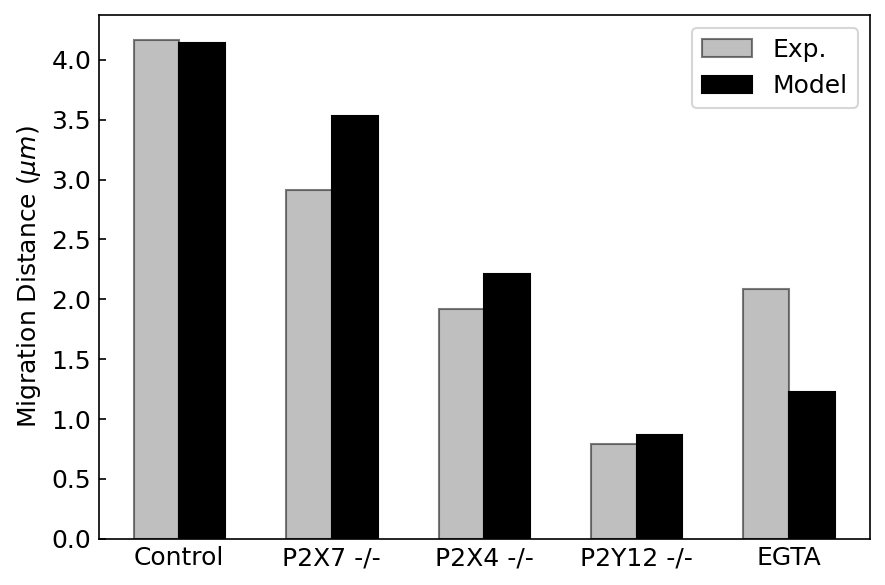

In [ ]:
data2 = np.array([p2y12[4][300],p2y12[2][300],p2y12[1][300],p2y12[3][300],p2y12[0][300]])
ratio = data2/max(data2)
expratio = np.array([100,70,46,19,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio*50/12, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
#plt.ylim([0.5,2.85])
plt.xticks(y_pos, objects)
plt.ylabel('Migration Distance ($\mu m$)',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)


In [ ]:
ATP = np.array([50])
time = 300
counter = 0
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                #elif p2x4[j] == 0 and p2x7[k] == 0:
                #    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                            ATP           = ATP[i],
                                            output_name   = 'test1',
                                            ode_file_name = odefilename,
                                            rhop2x4       = p2x4[j],
                                            rhop2x7       = p2x7[k],
                                            rhop2y12      = p2yc[l],
                                            rhop2yext     = p2yc[l],
                                            kf5_p2y12     = 0.001,
                                            data_name2    = 'Q12_ptxf',
                                            data_name3    = 'Gb',
                                            data_name4    = 'PI3Ka',
                                            data_name5    = 'pAkt',
                                            data_name6    = 'Distance',
                                            DegSwitch     = 0,
                                            removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        Q12     = data[2]
                        Gb      = data[3]
                        pi3ka   = data[4]
                        paktn    = data[5]
                        p2y12n   = data[6]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        p12     = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        Q12     = np.vstack([Q12,data[2]])
                        Gb      = np.vstack([Gb,data[3]])
                        pi3ka   = np.vstack([pi3ka,data[4]])
                        paktn    = np.vstack([paktn,data[5]])
                        p2y12n   = np.vstack([p2y12n,data[6]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        p12     = np.append(p12,p2yc[l])
                              
                    counter = counter + 1
    
import pandas as pd 

data = {
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Y12': p12
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 11.351516008377075 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.403694868087769 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.441200256347656 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.36962604522705 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.496867418289185 seconds --------------
 ------------ End of Simulation -----------


,ATP in uM,P2X4,P2X7,P2Y12
0,50,0,0,1
1,50,0,1,1
2,50,1,0,1
3,50,1,1,0
4,50,1,1,1


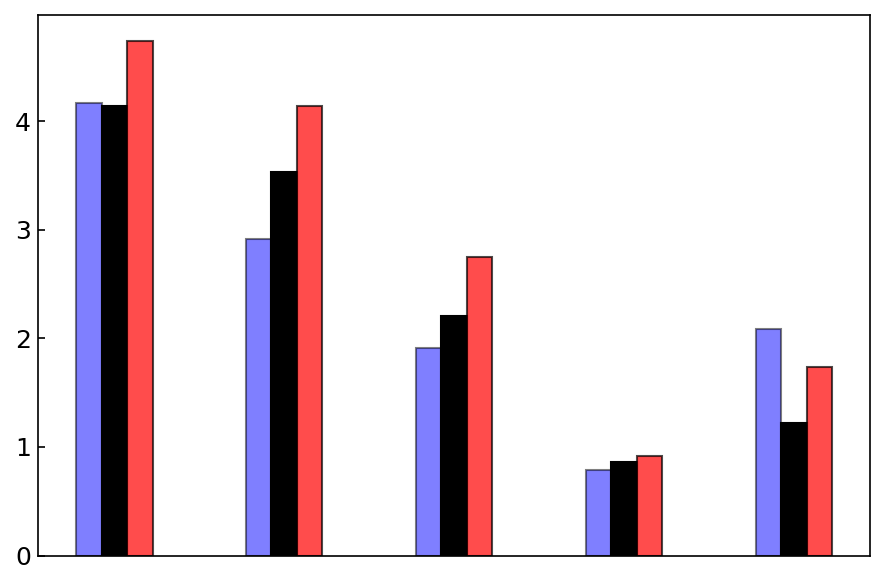

In [ ]:
data1 = np.array([p2y12[4][300],p2y12[2][300],p2y12[1][300],p2y12[3][300],p2y12[0][300]])
data2 = np.array([p2y12n[4][300],p2y12n[2][300],p2y12n[1][300],p2y12n[3][300],p2y12n[0][300]])
expratio = np.array([100,70,46,19,50])/100*50/12
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

bar_width = 0.15

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio, bar_width, align='center', color='blue', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos, data1, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
bar3 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='red', alpha=0.7, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
#plt.xticks(y_pos, objects)
#plt.ylabel('Migration Distance ($\mu m$)',fontsize=12)
#plt.yticks([])
plt.xticks([])
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)


#### KO of purinergic receptor and migration/TNFa production 

In [ ]:
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])
p2y12 = np.array([0,1])
A = np.array([0,10,50,100,1000])
time = 300
counter = 0

for i in np.arange(len(A)): # ATP
    for j in np.arange(len(p2yc)): # P2Yc
        for k in np.arange(len(p2x7)): # P2X7
            for l in np.arange(len(p2x4)): # P2X4
                for n in np.arange(len(p2y12)): #P2Y12
                    if p2yc[j] + p2x7[k] + p2x4[l] + p2y12[n] == 0:
                        continue
                    elif p2x7[k] + p2x4[l] + p2y12[n] == 0:
                        continue 
                    elif p2yc[j] + p2x4[l] + p2y12[n] == 0:
                        continue 
                    elif p2yc[j] + p2x7[k] + p2y12[n] == 0:
                        continue
                    elif p2yc[j] + p2x7[k] + p2x4[l]  == 0:
                        continue
                    elif p2x4[l] + p2y12[n]  == 0:
                        continue
                    elif p2yc[j] + p2x7[k]  == 0:
                        continue
                    elif p2yc[j] + p2y12[n]  == 0:
                        continue
                    elif p2yc[j] + p2x4[l] == 0:
                        continue
                    elif p2x7[k] + p2y12[n] == 0:
                        continue
                    elif p2x7[k] + p2x4[l]== 0:
                        continue
                        
                    data   = SR.gotranMicroglia(sim_time      = time,
                                                ATP           = A[i],
                                                output_name   = 'test1',
                                                ode_file_name = odefilename, ## it was 22 
                                                data_name2    = 'mRNA_TNF',
                                                data_name3    = 'PI3Ka',
                                                data_name4    = 'Ca4_CN',
                                                data_name5    = 'CaMCN',
                                                data_name6    = 'pAkt',
                                                data_name7    = 'Distance',
                                                data_name8    = 'VelMig',
                                                data_name9    = 'NFATNn',
                                                data_name10   = 'TNFae',
                                                rhop2x4       = p2x4[l],
                                                rhop2x7       = p2x7[k],
                                                rhop2yc       = p2yc[j],
                                                rhop2y12      = p2y12[n],
                                                DegSwitch     = 1,
                                                removePickle  = 1)
                    
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        mRNATNF = data[2]
                        PI3K    = data[3]
                        actCN   = 0.1*data[4] + data[5]
                        pakt    = data[6]
                        dist    = data[7]
                        vel  = data[8]
                        nfatnn   = data[9]
                        TNFae    = data[10]
                        entry   = counter
                        atp     = A[i]
                        p4      = p2x4[l]
                        p7      = p2x7[k]
                        py      = p2yc[j]
                        p12     = p2y12[n]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        mRNATNF = np.vstack([mRNATNF,data[2]])
                        PI3K    = np.vstack([PI3K,data[3]])
                        actCN   = np.vstack([actCN,0.1*data[4] + data[5]])
                        pakt    = np.vstack([pakt,data[6]])
                        dist    = np.vstack([dist,data[7]])
                        vel  = np.vstack([vel,data[8]])
                        nfatnn   = np.vstack([nfatnn,data[9]])
                        TNFae    = np.vstack([TNFae,data[10]])
                        entry   = np.append(entry,counter)
                        atp     = np.append(atp,A[i])
                        p4      = np.append(p4,p2x4[l])
                        p7      = np.append(p7,p2x7[k])
                        py      = np.append(py,p2yc[j])
                        p12     = np.append(p12,p2y12[n])
                              
                    counter = counter + 1
                    
                    
import pandas as pd 

data = {
    'Entry': entry,
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Yc': py,
    'P2Y12': p12,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 10.9914071559906 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.320275068283081 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.437549352645874 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.180349826812744 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.390746355056763 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.803819417953491 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.895737886428833 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.026276350021362 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.079981565475464 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.120248794555664 seconds --------------
 ------------ End of Simul

,Entry,ATP in uM,P2X4,P2X7,P2Yc,P2Y12
0,0,0,1,1,0,1
1,1,0,1,0,1,1
2,2,0,0,1,1,1
3,3,0,1,1,1,0
4,4,0,1,1,1,1
5,5,10,1,1,0,1
6,6,10,1,0,1,1
7,7,10,0,1,1,1
8,8,10,1,1,1,0
9,9,10,1,1,1,1


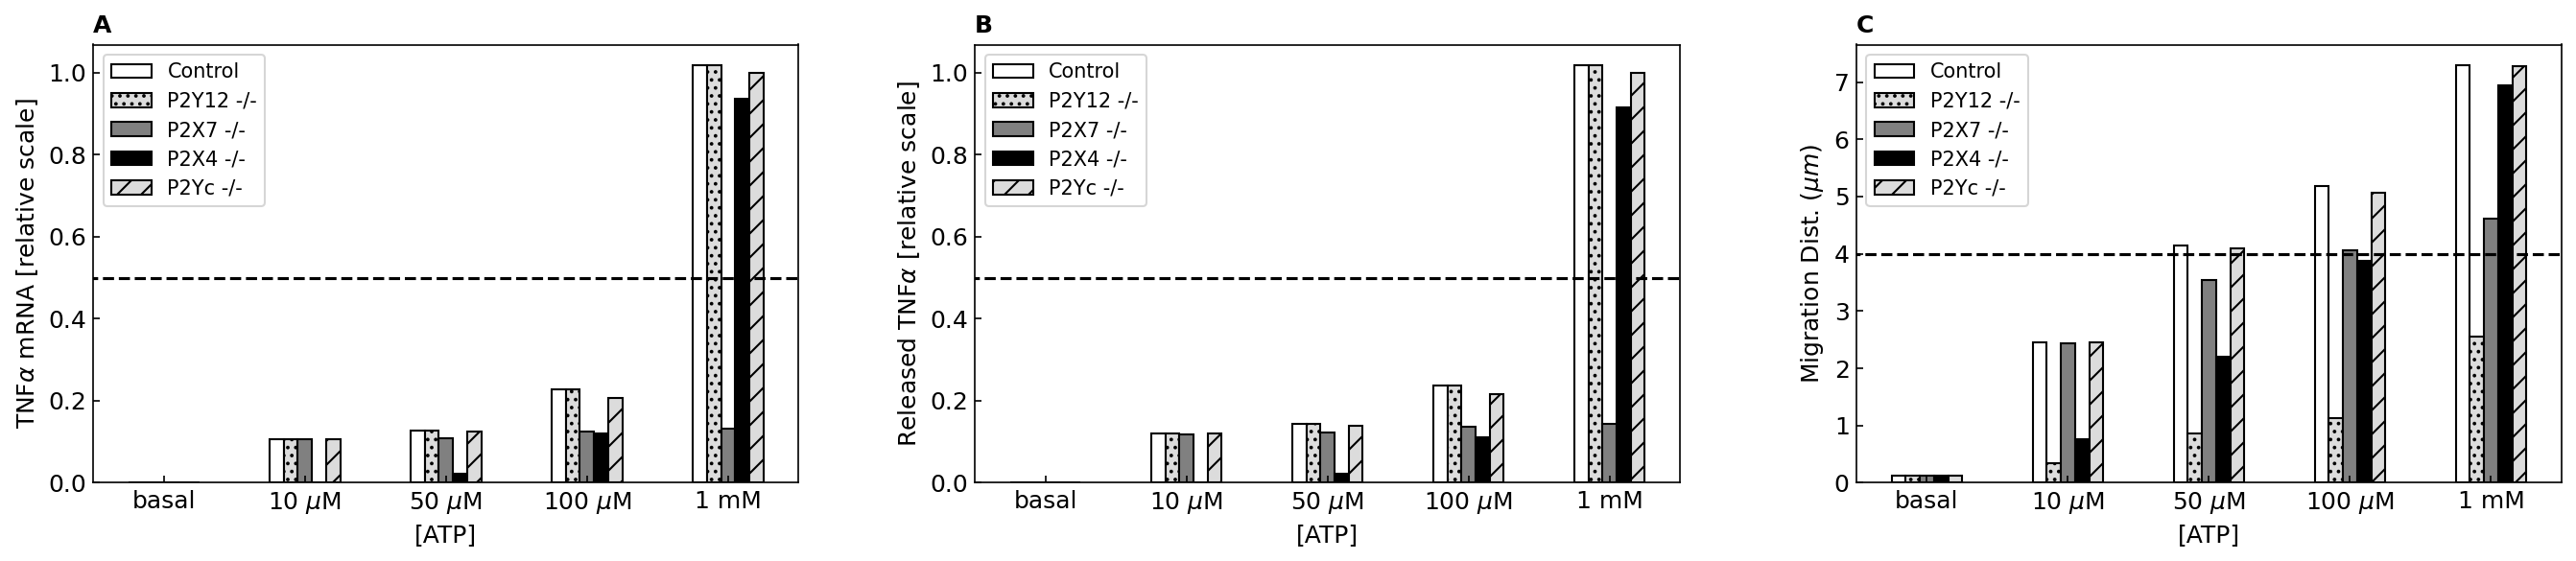

In [ ]:
objects = ('basal','10 $\mu$M','50 $\mu$M','100 $\mu$M','1 mM')
y_pos = np.arange(len(objects))
x = 4 # control
y = 3  # P2Y12 -/-
z = 1  # P2X7 -/-
w = 2  # P2X4 -/-
t = 0  # P2Yc -/-
r = 5
data = np.array([mRNATNF[x][-1],mRNATNF[x+r][-1],mRNATNF[x+r*2][-1],mRNATNF[x+r*3][-1],mRNATNF[x+r*4][-1],
                 mRNATNF[y][-1],mRNATNF[y+r][-1],mRNATNF[y+r*2][-1],mRNATNF[y+r*3][-1],mRNATNF[y+r*4][-1],
                 mRNATNF[z][-1],mRNATNF[z+r][-1],mRNATNF[z+r*2][-1],mRNATNF[z+r*3][-1],mRNATNF[z+r*4][-1],
                 mRNATNF[w][-1],mRNATNF[w+r][-1],mRNATNF[w+r*2][-1],mRNATNF[w+r*3][-1],mRNATNF[w+r*4][-1],
                 mRNATNF[t][-1],mRNATNF[t+r][-1],mRNATNF[t+r*2][-1],mRNATNF[t+r*3][-1],mRNATNF[t+r*4][-1]])

control = (np.array([mRNATNF[x][-1],mRNATNF[x+r][-1],mRNATNF[x+r*2][-1],mRNATNF[x+r*3][-1],mRNATNF[x+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2y12 = (np.array([mRNATNF[y][-1],mRNATNF[y+r][-1],mRNATNF[y+r*2][-1],mRNATNF[y+r*3][-1],mRNATNF[y+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2x7 = (np.array([mRNATNF[z][-1],mRNATNF[z+r][-1],mRNATNF[z+r*2][-1],mRNATNF[z+r*3][-1],mRNATNF[z+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2x4 = (np.array([mRNATNF[w][-1],mRNATNF[w+r][-1],mRNATNF[w+r*2][-1],mRNATNF[w+r*3][-1],mRNATNF[w+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2yc = (np.array([mRNATNF[t][-1],mRNATNF[t+r][-1],mRNATNF[t+r*2][-1],mRNATNF[t+r*3][-1],mRNATNF[t+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))


bar_width = 0.1
space = bar_width/2

plt.figure(figsize=(18,4),dpi=150)
ax = plt.subplot(1,3,1)
plt.title('A',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[0.5,0.5],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'TNF$\alpha$ mRNA [relative scale]',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

data = np.array([TNFae[x][-1],TNFae[x+r][-1],TNFae[x+r*2][-1],TNFae[x+r*3][-1],TNFae[x+r*4][-1],
                 TNFae[y][-1],TNFae[y+r][-1],TNFae[y+r*2][-1],TNFae[y+r*3][-1],TNFae[y+r*4][-1],
                 TNFae[z][-1],TNFae[z+r][-1],TNFae[z+r*2][-1],TNFae[z+r*3][-1],TNFae[z+r*4][-1],
                 TNFae[w][-1],TNFae[w+r][-1],TNFae[w+r*2][-1],TNFae[w+r*3][-1],TNFae[w+r*4][-1],
                 TNFae[t][-1],TNFae[t+r][-1],TNFae[t+r*2][-1],TNFae[t+r*3][-1],TNFae[t+r*4][-1]])
control = (np.array([TNFae[x][-1],TNFae[x+r][-1],TNFae[x+r*2][-1],TNFae[x+r*3][-1],TNFae[x+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2y12 = (np.array([TNFae[y][-1],TNFae[y+r][-1],TNFae[y+r*2][-1],TNFae[y+r*3][-1],TNFae[y+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2x7 = (np.array([TNFae[z][-1],TNFae[z+r][-1],TNFae[z+r*2][-1],TNFae[z+r*3][-1],TNFae[z+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2x4 = (np.array([TNFae[w][-1],TNFae[w+r][-1],TNFae[w+r*2][-1],TNFae[w+r*3][-1],TNFae[w+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2yc = (np.array([TNFae[t][-1],TNFae[t+r][-1],TNFae[t+r*2][-1],TNFae[t+r*3][-1],TNFae[t+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))

ax = plt.subplot(1,3,2)
plt.title('B',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[0.5,0.5],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'Released TNF$\alpha$ [relative scale]',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

data = np.array([dist[x][-1],dist[x+r][-1],dist[x+r*2][-1],dist[x+r*3][-1],dist[x+r*4][-1],
                 dist[y][-1],dist[y+r][-1],dist[y+r*2][-1],dist[y+r*3][-1],dist[y+r*4][-1],
                 dist[z][-1],dist[z+r][-1],dist[z+r*2][-1],dist[z+r*3][-1],dist[z+r*4][-1],
                 dist[w][-1],dist[w+r][-1],dist[w+r*2][-1],dist[w+r*3][-1],dist[w+r*4][-1],
                 dist[t][-1],dist[t+r][-1],dist[t+r*2][-1],dist[t+r*3][-1],dist[t+r*4][-1]])


control = np.array([dist[x][-1],dist[x+r][-1],dist[x+r*2][-1],dist[x+r*3][-1],dist[x+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2y12   = np.array([dist[y][-1],dist[y+r][-1],dist[y+r*2][-1],dist[y+r*3][-1],dist[y+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2x7    = np.array([dist[z][-1],dist[z+r][-1],dist[z+r*2][-1],dist[z+r*3][-1],dist[z+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2x4    = np.array([dist[w][-1],dist[w+r][-1],dist[w+r*2][-1],dist[w+r*3][-1],dist[w+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2yc    = np.array([dist[t][-1],dist[t+r][-1],dist[t+r*2][-1],dist[t+r*3][-1],dist[t+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]


ax = plt.subplot(1,3,3)
plt.title('C',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[4,4],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Migration Dist. ($\mu m$)',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)
plt.savefig("mRNAvsTNFvsMig.png")

#### 5 min stimulation duration 

In [ ]:
p2  = {'acute':1/11.1,'prime':1,'bv':1}
p4  = {'acute':1/2.95,'prime':1,'bv':0.187}
p7  = {'acute':2.65,'prime':1,'bv':0.65}
p12 = {'acute':100,'prime':1,'bv':0.03}
CellType = ['acute','prime','bv']
ATP = [50,100,200,500]
duration = [300,600,900]
data_storage = {}

for celltype in CellType:
    for a in ATP:
        for t in duration:
            data = SR.gotranMicroglia(sim_time      = t,
                                      ATP           = a,
                                      rhop2yc       = p2[celltype],
                                      rhop2y12      = p12[celltype],
                                      rhop2x4       = p4[celltype],
                                      rhop2x7       = p7[celltype],
                                      output_name   = 'test1',
                                      ode_file_name = odefilename,
                                      data_name2    = 'pAkt',
                                      data_name3    = 'Distance',
                                      data_name4    = 'TNFae',
                                      data_name5    = 'VelMig',
                                      data_name6    = 'mRNA_TNF',
                                      removePickle  = 1,
                                      timePrint     = 0)
            T = int(t/60)
            data_storage[celltype+str(a)+'uM'+str(T)+'minVel'] = data[5]
            data_storage[celltype+str(a)+'uM'+str(T)+'minTNF'] = data[4]
            data_storage[celltype+str(a)+'uM'+str(T)+'minCa'] = data[1]
            data_storage[celltype+str(a)+'uM'+str(T)+'minDist'] = data[3]
            
            if t == 900:
                dura = data[0]

In [ ]:
acute50 = [0,data_storage['acute50uM5minDist'][-1],data_storage['acute50uM10minDist'][-1],data_storage['acute50uM15minDist'][-1]]
acute100 = [0,data_storage['acute100uM5minDist'][-1],data_storage['acute100uM10minDist'][-1],data_storage['acute100uM15minDist'][-1]]
acute500 = [0,data_storage['acute500uM5minDist'][-1],data_storage['acute500uM10minDist'][-1],data_storage['acute500uM15minDist'][-1]]

prime50 = [0,data_storage['prime50uM5minDist'][-1],data_storage['prime50uM10minDist'][-1],data_storage['prime50uM15minDist'][-1]]
prime100 = [0,data_storage['prime100uM5minDist'][-1],data_storage['prime100uM10minDist'][-1],data_storage['prime100uM15minDist'][-1]]
prime500 = [0,data_storage['prime500uM5minDist'][-1],data_storage['prime500uM10minDist'][-1],data_storage['prime500uM15minDist'][-1]]

bv50 = [0,data_storage['bv50uM5minDist'][-1],data_storage['bv50uM10minDist'][-1],data_storage['bv50uM15minDist'][-1]]
bv100 = [0,data_storage['bv100uM5minDist'][-1],data_storage['bv100uM10minDist'][-1],data_storage['bv100uM15minDist'][-1]]
bv500 = [0,data_storage['bv500uM5minDist'][-1],data_storage['bv500uM10minDist'][-1],data_storage['bv500uM15minDist'][-1]]

In [ ]:
ATP = np.array([0,50,100,200,500])
acute = [0,data_storage['acute50uM5minDist'][-1],data_storage['acute100uM5minDist'][-1],data_storage['acute200uM5minDist'][-1],data_storage['acute500uM5minDist'][-1]]
prime = [0,data_storage['prime50uM5minDist'][-1],data_storage['prime100uM5minDist'][-1],data_storage['prime200uM5minDist'][-1],data_storage['prime500uM5minDist'][-1]]
bv2 = [0,data_storage['bv50uM5minDist'][-1],data_storage['bv100uM5minDist'][-1],data_storage['bv200uM5minDist'][-1],data_storage['bv500uM5minDist'][-1]]
exptATP = [0,100,500]
exptData = np.array([0, 13.726,16.1536])
ATPnew = np.linspace(ATP.min(), ATP.max(), ATP.max())  
def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(ATP,acute,'k--',lw=2,alpha=1,label='Acute')
plt.plot(ATP,prime,'navy',lw=3,alpha=1,label='Primary Culture')
plt.plot(ATP,bv2,'darkgreen',lw=3,alpha=1,label='BV2')
#plt.plot(ATPnew,func(ATPnew,2.7,120,2),'g:',lw=3,alpha=1,label='Expt. - BV2 (placeholder)')
plt.plot(exptATP,exptData,'g',marker='x',markersize=8,lw=0,alpha=1,label='Expt. - BV2 (placeholder)')
plt.errorbar(exptATP,exptData, yerr=[0,3.37,1.736],fmt='none',color='green',lw=1, capthick=3)
plt.plot(50,4.1,'b',marker='X',markersize=10,lw=0,alpha=1,label='Expt. - BV2 (placeholder)')
#plt.ylabel('Migration ($\mu m$)',fontsize=10)
#plt.xlabel('ATP ($\mu M$)',fontsize=12)
#plt.legend(loc=0,fontsize=9)
plt.tight_layout()
#plt.savefig('migATPinterpolation.png')

In [ ]:
p4 = {'rest':1/2.95, 'primary': 1, 'bv2':0.187}
p7 = {'rest':2.65,   'primary': 1, 'bv2':0.65}
py = {'rest':1/11.1, 'primary': 1, 'bv2':1}
p12= {'rest':100,   'primary': 1, 'bv2':0.03}
ATP = [0, 10, 50, 100, 1000]

collectedData = {}

# Primary Cultured
for atp in ATP:
    for expr in ['rest','primary','bv2']:
        data   = SR.gotranMicroglia(sim_time      = 300,
                                    ATP           = atp,
                                    rhop2yc       = py[expr],
                                    rhop2y12      = p12[expr],
                                    rhop2x4       = p4[expr],
                                    rhop2x7       = p7[expr],
                                    output_name   = 'test1',
                                    ode_file_name = odefilename,
                                    stim_duration = 300, # in second
                                    data_name2    = 'NFATNn',
                                    data_name3    = 'VelMig',
                                    data_name4    = 'TNFae',
                                    data_name5    = 'Distance',
                                    data_name6    = 'SigCaM',
                                    data_name7    = 'pAkt',
                                    data_name8    = 'Ca4_CaM',
                                    data_name9    = 'SigpA',
                                    data_name10   = 'VelMig',
                                    removePickle  = 1,
                                    PulSwitch     = 1,
                                    timePrint     = 1)
        collectedData[str(atp)+expr] = data

 -------------- 10.992735147476196 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.103899478912354 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.335838556289673 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.205273151397705 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.935510873794556 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.819087505340576 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.866273641586304 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.788041591644287 seconds --------------
 ------------ End of Simulation -----------
 -------------- 10.914974927902222 seconds --------------
 ------------ End of Simulation -----------
 -------------- 11.056198596954346 seconds --------------
 ------------ End of Sim

In [ ]:
dura = collectedData['10rest'][0]

In [ ]:
t = [0,1,5,15,30]
value = [0, 0.25,0.54,0.95,1]
def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)
time = np.arange(31)
plt.plot(t,value)
plt.plot(time,func(time,1.2,6,1))
plt.plot(time,func(time,1.2*0.5,6,1))
plt.plot(time,func(time,1.2/20,6,1))

print(func(5,1.2*0.5,6,1))

In [ ]:
time = scipy.linspace(0,5,20)

def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)

maxexp = func(5,1.2*0.5,6,1)

init = min(collectedData['50primary'][2])
final = max(collectedData['1000primary'][2]) -init
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,(collectedData['50primary'][2]-init)/final,'b',lw=3.5,alpha=0.25,label='50 $\mu$M')
plt.plot(dura,(collectedData['100primary'][2]-init)/final,'b',lw=3.5,alpha=0.65,label='100 $\mu$M')
plt.plot(dura,(collectedData['1000primary'][2]-init)/final,'b',lw=3.5,alpha=1,label='1 mM')
plt.plot(time*60,func(time,1.2/20,6,1)/maxexp,'b--',lw=2,alpha=0.65,label='100 $\mu$M - Ferrari et al.')
plt.plot(time*60,func(time,1.2/2,6,1)/maxexp,'b:',lw=2,alpha=1,label='1 mM - Ferrari et al.')
plt.plot([0,300],[-0.07,-0.07],'k',lw=5,label='ATP')
plt.ylabel('Dephos. NFAT in nucleus (Scale)',fontsize=10)
plt.xlabel('Time (sec)',fontsize=12)
plt.legend(loc=0,fontsize=9)
plt.tight_layout()
plt.savefig('NFATtime.png')

## NFAT Validation

In [ ]:
p2x4 = np.array([0,1,9])
p2x7 = np.array([0,1])
p2y1 = 1
scale = 10000
###### No ATP ####################################
d0     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 3000,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d00     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 0,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d100     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 100,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d500     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 500,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)
d1000     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 1000,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d3000     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 3000,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

FileNotFoundError: ignored

In [ ]:
LitNFATr = np.array([0,0.26,0.95,1,0.95]) # in fraction
Littime = np.array([0,1,15,30,60]) # in min
CalcData = np.array([d0[4][0],d0[4][59],d0[4][899],d0[4][1799],d0[4][3599]])-d0[4][0]
ProcData = CalcData/max(CalcData)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12)
plt.plot(Littime,ProcData,'b-s',label="Model at 3 mM [ATP]")
plt.plot(Littime,LitNFATr,'r--s',label="Ferrari et al., at 3 mM [ATP]")

plt.xlim(-2,62)
plt.ylim(-0.05,1.05)

plt.legend(loc=0,fontsize=10)
plt.xlabel("Time [min]",fontsize=12)
plt.ylabel("Dephosphorylated NFAT [Scale]",fontsize=12)
plt.tight_layout()

ATPmM1 = np.array([0,0.1,0.5,1,3])
ATPmM2 = np.array([0,0.1,0.5,1,3,5]) 
LitNFATr = np.array([0,0.05,0.1,0.5,1,0.3])
CalcData2 = np.array([d00[4][-1],d100[4][-1],d500[4][-1],d1000[4][-1],d3000[4][-1]])-d00[4][-1]
ProcData2 = CalcData2/max(CalcData2)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12)
plt.plot(ATPmM1,ProcData2,'b-s',label="Model for 15 min")
plt.plot(ATPmM2,LitNFATr,'r--s',label="Ferrari et. al., for 15 min")

plt.xlim(-0.1,5.1)
plt.ylim(-0.05,1.05)

plt.legend(loc=0,fontsize=10)
plt.xlabel("ATP [mM]",fontsize=12)
plt.ylabel("Dephosphorylated NFAT [Scale]",fontsize=12)
plt.tight_layout()

## CD39

In [ ]:
# Exp 
time   = np.array([0,5,10,20,30,40,60])
ATPexp = np.array([509.8901099,298.9010989,168.1318681,32.96703297,4.395604396,0,0])
ADPexp = np.array([0,50.54945055,70.32967033,52.74725275,9.89010989,0,0])
AMPexp = np.array([0,160.4395604,264.8351648,420.8791209,500,507.6923077,508.7912088])

def func(y,t):
    ATP,ADP,AMP = y
    
    k1f = 0.0018
    k1b = 0.001 
    k2 = 0.00008
    
    dATPdt = -k1f*ATP + k1b*ADP
    dADPdt = k1f*ATP - k1b*ADP - k2*ADP**2
    dAMPdt = k2*ADP**2
    
    dydt = [dATPdt, dADPdt, dAMPdt]
    
    return dydt

t = scipy.linspace(0,3600,3600)

y0 = np.array([510,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,2),dpi=150)
plt.tick_params(labelsize=12,direction='in')

plt.plot(time,ATPexp,'r--o',alpha=0.5,label="exp. ATP")
plt.plot(time,ADPexp,'b--s',alpha=0.5,label="exp. ADP")
plt.plot(time,AMPexp,'g--x',alpha=0.5,label="exp. AMP")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='ATP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADP')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='AMP')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

In [ ]:
data_w_deg_10    = SR.gotranMicroglia(sim_time      = 300,
                                   ATP           = 10,
                                   rhop2yc       = 1,
                                   rhop2y12      = 1,
                                   rhop2x4       = 1,
                                   rhop2x7       = 1,
                                   output_name   = 'test1',
                                   ode_file_name = odefilename,
                                   data_name2    = 'pAkt',
                                   data_name3    = 'Distance',
                                   data_name4    = 'TNFae',
                                   data_name5    = 'VelMig',
                                   data_name6    = 'mRNA_TNF',
                                   removePickle  = 1,
                                   DegSwitch     = 1,
                                   timePrint     = 0)
data_wo_deg_10 = SR.gotranMicroglia(sim_time      = 300,
                                 ATP           = 10,
                                 rhop2yc       = 1,
                                 rhop2y12      = 1,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'pAkt',
                                 data_name3    = 'Distance',
                                 data_name4    = 'TNFae',
                                 data_name5    = 'VelMig',
                                 data_name6    = 'mRNA_TNF',
                                 removePickle  = 1,
                                 DegSwitch     = 0,
                                 timePrint     = 0)

data_w_deg_50    = SR.gotranMicroglia(sim_time      = 300,
                                   ATP           = 50,
                                   rhop2yc       = 1,
                                   rhop2y12      = 1,
                                   rhop2x4       = 1,
                                   rhop2x7       = 1,
                                   output_name   = 'test1',
                                   ode_file_name = odefilename,
                                   data_name2    = 'pAkt',
                                   data_name3    = 'Distance',
                                   data_name4    = 'TNFae',
                                   data_name5    = 'VelMig',
                                   data_name6    = 'mRNA_TNF',
                                   removePickle  = 1,
                                   DegSwitch     = 1,
                                   timePrint     = 0)
data_wo_deg_50 = SR.gotranMicroglia(sim_time      = 300,
                                 ATP           = 50,
                                 rhop2yc       = 1,
                                 rhop2y12      = 1,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'pAkt',
                                 data_name3    = 'Distance',
                                 data_name4    = 'TNFae',
                                 data_name5    = 'VelMig',
                                 data_name6    = 'mRNA_TNF',
                                 removePickle  = 1,
                                 DegSwitch     = 0,
                                 timePrint     = 0)

data_w_deg_100    = SR.gotranMicroglia(sim_time      = 300,
                                   ATP           = 100,
                                   rhop2yc       = 1,
                                   rhop2y12      = 1,
                                   rhop2x4       = 1,
                                   rhop2x7       = 1,
                                   output_name   = 'test1',
                                   ode_file_name = odefilename,
                                   data_name2    = 'pAkt',
                                   data_name3    = 'Distance',
                                   data_name4    = 'TNFae',
                                   data_name5    = 'VelMig',
                                   data_name6    = 'mRNA_TNF',
                                   removePickle  = 1,
                                   DegSwitch     = 1,
                                   timePrint     = 0)
data_wo_deg_100 = SR.gotranMicroglia(sim_time      = 300,
                                 ATP           = 100,
                                 rhop2yc       = 1,
                                 rhop2y12      = 1,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 data_name2    = 'pAkt',
                                 data_name3    = 'Distance',
                                 data_name4    = 'TNFae',
                                 data_name5    = 'VelMig',
                                 data_name6    = 'mRNA_TNF',
                                 removePickle  = 1,
                                 DegSwitch     = 0,
                                 timePrint     = 0)

In [ ]:
dura = data_w_deg_10[0]
tnfw10 = data_w_deg_10[6]
tnfwo10 = data_wo_deg_10[6]
tnfw50 = data_w_deg_50[6]
tnfwo50 = data_wo_deg_50[6]
tnfw100 = data_w_deg_100[6]
tnfwo100 = data_wo_deg_100[6]
d1 = (tnfw10 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d2 = (tnfwo10 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d3 = (tnfw50 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d4 = (tnfwo50 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d5 = (tnfw100 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d6 = (tnfwo100 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,d1,'r-',lw=2,label='10 $\mu M$')
plt.plot(dura/60,d2,'r-',lw=1,alpha=0.5,label='10 $\mu M$, CD39 -/-')
plt.plot(dura/60,d3,'b-',lw=2,label='50 $\mu M$')
plt.plot(dura/60,d4,'b-',lw=1,alpha=0.5,label='50 $\mu M$, CD39 -/-')
plt.plot(dura/60,d5,'g-',lw=2,label='100 $\mu M$')
plt.plot(dura/60,d6,'g-',lw=1,alpha=0.5,label='100 $\mu M$, CD39 -/-')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel(r'TNF$\alpha$ mRNA (scale)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.tight_layout()